In [ ]:
import sympy as smp

## Dynamical Variables
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)
theta = smp.symbols('theta', real = True) ## theta is the angle between r1 and r2 vector.

## To get theta (or more specifically, cos(theta))
x1 = smp.Function(r'x1')(r1, theta1, phi1)
x2 = smp.Function(r'x2')(r2, theta2, phi2)

y1 = smp.Function(r'y1')(r1, theta1, phi1)
y2 = smp.Function(r'y2')(r2, theta2, phi2)

z1 = smp.Function(r'z1')(r1, theta1)
z2 = smp.Function(r'z2')(r2, theta2)

## Wavefunction and Potential V
Psi = smp.Function('Psi')(r1, theta1, phi1, r2, theta2, phi2)
V = smp.Function('V')(r1, theta1, phi1, r2, theta2, phi2)

In [ ]:
## To define Hamiltonian operator

absolute_diff = smp.sqrt(r1**2 + r2**2 - 2*r1*r2*smp.cos(theta))  ## |r1 - r1|
V_eff = -2/r1 - 2/r2 + 1/(absolute_diff)  ## V = -2/r1 -2/r2 + 1/|r1-r2|

Laplacian = - 1/2 * (1/r1**2) * smp.diff(r1**2 * smp.diff(Psi, r1), r1) - 1/2 * (1/r2**2) * smp.diff(r2**2 * smp.diff(Psi, r2), r2) - 1/2 * (1/(r1**2 * smp.sin(theta1))) * smp.diff(smp.sin(theta1) * smp.diff(Psi, theta1), theta1) - 1/2 * (1/(r2**2 * smp.sin(theta2))) * smp.diff(smp.sin(theta2) * smp.diff(Psi, theta2), theta2) - 1/2 * (1/(r1**2 * smp.sin(theta1)**2)) * smp.diff(smp.diff(Psi, phi1), phi1) - 1/2 * (1/(r2**2 * smp.sin(theta2)**2)) * smp.diff(smp.diff(Psi, phi2), phi2)

Hamiltonian = V_eff*Psi + Laplacian

Hamiltonian

(1/sqrt(r1**2 - 2*r1*r2*cos(theta) + r2**2) - 2/r2 - 2/r1)*Psi(r1, theta1, phi1, r2, theta2, phi2) - 0.5*(r2**2*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (r2, 2)) + 2*r2*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), r2))/r2**2 - 0.5*(sin(theta2)*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (theta2, 2)) + cos(theta2)*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), theta2))/(r2**2*sin(theta2)) - 0.5*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (phi2, 2))/(r2**2*sin(theta2)**2) - 0.5*(r1**2*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (r1, 2)) + 2*r1*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), r1))/r1**2 - 0.5*(sin(theta1)*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (theta1, 2)) + cos(theta1)*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), theta1))/(r1**2*sin(theta1)) - 0.5*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (phi1, 2))/(r1**2*sin(theta1)**2)

In [ ]:
x1 = r1 * smp.sin(theta1) * smp.cos(phi1)
x2 = r2 * smp.sin(theta2) * smp.cos(phi2)

y1 = r1 * smp.sin(theta1) * smp.sin(phi1)
y2 = r2 * smp.sin(theta2) * smp.sin(phi2)

z1 = r1 * smp.cos(theta1)
z2 = r2 * smp.cos(theta2)

# r1 and r2 vector in cartesian coordinates
r1_cartesian = smp.Matrix([x1, y1, z1])
r2_cartesian = smp.Matrix([x2, y2, z2])

# Compute the dot product
dot_product = r1_cartesian.dot(r2_cartesian)

# Compute the magnitude of r1 and r2
magnitude_r1 = smp.sqrt(x1**2 + y1**2 + z1**2)
magnitude_r2 = smp.sqrt(x2**2 + y2**2 + z2**2)

# Compute cos(theta) and sin(theta)
cos_theta = dot_product / (magnitude_r1 * magnitude_r2)
sin_theta = smp.sqrt(1 - cos_theta**2)

In [ ]:
## Defining 7 basis functions

Phi_1 = smp.Function('\Phi_1')(r1,theta1, phi1, r2, theta2, phi2)
Phi_1 = smp.exp(-2 * (r1 + r2))

Phi_2 = smp.Function('\Phi_2')(r1,theta1, phi1, r2, theta2, phi2)
Phi_2 = smp.exp(-2 * (r1 + r2)) * (r1 + r2)

Phi_3 = smp.Function('\Phi_3')(r1,theta1, phi1, r2, theta2, phi2)
Phi_3 = smp.exp(-2 * (r1 + r2)) * absolute_diff

Phi_4 = smp.Function('\Phi_4')(r1,theta1, phi1, r2, theta2, phi2)
Phi_4 = smp.exp(-2 * (r1 + r2)) * r1*r2

Phi_5 = smp.Function('\Phi_5')(r1,theta1, phi1, r2, theta2, phi2)
Phi_5 = smp.exp(-2 * (r1 + r2)) * (r1 + r2)**2

Phi_6 = smp.Function('\Phi_6')(r1,theta1, phi1, r2, theta2, phi2)
Phi_6 = smp.exp(-2 * (r1 + r2)) * absolute_diff**2

Phi_7 = smp.Function('\Phi_7')(r1,theta1, phi1, r2, theta2, phi2)
Phi_7 = smp.exp(-2 * (r1 + r2)) * (r1 + r2) * absolute_diff

In [ ]:
Phi_1 = Phi_1.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)
Phi_2 = Phi_2.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)
Phi_3 = Phi_3.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)
Phi_4 = Phi_4.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)
Phi_5 = Phi_5.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)
Phi_6 = Phi_6.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)
Phi_7 = Phi_7.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)

Hamiltonian_modified = Hamiltonian.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)

## After this all 7 basis functions and Hamiltonian will depend on 6 dynamical variables. Before that, some functions were dependent on theta (cos(theta)).

In [ ]:
## proposed pdf
pdf2 = (Phi_1 + Phi_2 + Phi_3 + Phi_4 + Phi_5 + Phi_6 + Phi_7)**2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
pdf2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], pdf2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
## Sampling_function

def Sampling_func(x , mean_x, std):
  return (1/np.sqrt(2 * np.pi * std**2)) * np.exp(-(x - mean_x)**2 / (2 * std**2))

In [ ]:
def p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result_p2 = pdf2_f(r1, theta1, phi1, r2, theta2, phi2)

        # Check for NaN or inf values
    if np.isnan(result_p2) or np.isinf(result_p2):
      return -np.inf

    else:
      return result_p2

In [ ]:
# def metropolis_sampling(p, Sampling_func, initial, num_samples, Range_value, std):

#   current_r1, current_theta1, current_phi1, current_r2, current_theta2, current_phi2 = initial
#   range_r, range_theta, range_phi = Range_value

#   current = initial
#   samples = []
#   num_accept = 0

#   for i in range(num_samples):
#     while True: ## This while loop is used to eliminate those samples for which Num or Den is infinity or Nan.

#       # candidate_theta1 = np.random.uniform(0, np.pi)
#       # candidate_theta2 = np.random.uniform(0, np.pi)

#       # candidate_phi1 = np.random.uniform(0, 2*np.pi)
#       # candidate_phi2 = np.random.uniform(0, 2*np.pi)

#       candidate_theta1 = current_theta1 + range_theta * (np.random.uniform(0,1) - 0.5)
#       candidate_theta2 = current_theta2 + range_theta * (np.random.uniform(0,1) - 0.5)

#       candidate_phi1 = current_phi1 + range_phi * (np.random.uniform(0,1) - 0.5)
#       candidate_phi2 = current_phi2 + range_phi * (np.random.uniform(0,1) - 0.5)

#       candidate_r1 = current_r1 + range_r * (np.random.uniform(0,1) - 0.5)
#       candidate_r2 = current_r2 + range_r * (np.random.uniform(0,1) - 0.5)

#       if candidate_theta1 > np.pi:
#         candidate_theta1 = np.pi - (candidate_theta1 - np.pi)

#       if candidate_theta2 > np.pi:
#         candidate_theta2 = np.pi - (candidate_theta2 - np.pi)

#       if candidate_theta1 < 0:
#         candidate_theta1 = -candidate_theta1

#       if candidate_theta2 < 0:
#         candidate_theta2 = -candidate_theta2

#       if candidate_phi1 > 2*np.pi:
#         candidate_phi1 = candidate_phi1 - 2*np.pi

#       if candidate_phi2 > 2*np.pi:
#         candidate_phi2 = candidate_phi2 - 2*np.pi

#       if candidate_phi1 < 0:
#         candidate_phi1 = -candidate_phi1

#       if candidate_phi2 < 0:
#         candidate_phi2 = -candidate_phi2

#       if (0 <= candidate_r1 and 0 <= candidate_r2):  ## If r1 or r2 is negative, then the candidate will be discarded and we will again start within while loop

#         candidate = [candidate_r1, candidate_theta1, candidate_phi1, candidate_r2, candidate_theta2, candidate_phi2]
#         candidate_value_p = p(candidate)

#         # Discard if candidate value is NaN or inf
#         if (candidate_value_p != -np.inf):
#           break

#     acceptance_prob = min(1, (p(candidate) / p(current)))

#     if np.random.uniform(0,1) < acceptance_prob: ## Candidate will be accepted
#       current_r1, current_r2 = candidate_r1, candidate_r2
#       current_theta1, current_theta2 = candidate_theta1, candidate_theta2
#       current_phi1, current_phi2 = candidate_phi1, candidate_phi2

#       current = [candidate_r1, candidate_theta1, candidate_phi1, candidate_r2, candidate_theta2, candidate_phi2]
#       num_accept += 1

#     samples.append(current)

#   return np.array(samples), num_accept

In [ ]:
# Monte Carlo integration
def monte_carlo_integration(samples, p,  Num, Den):

    Num_values = np.array([Num(sample) / p(sample) for sample in samples])
    Num_values = Num_values[~np.isnan(Num_values) & ~np.isinf(Num_values)]

    Den_values = np.array([Den(sample) / p(sample) for sample in samples])
    Den_values = Den_values[~np.isnan(Den_values) & ~np.isinf(Den_values)]

    values = np.mean(Num_values) / np.mean(Den_values)

    return values, np.mean(Num_values), np.mean(Den_values)

In [ ]:
from multiprocessing import Pool

# Modified Metropolis Sampling Function to take num_samples as an input argument
def metropolis_sampling_parallel(args):
    p, initial, num_samples, range_value, std = args
    current_r1, current_theta1, current_phi1, current_r2, current_theta2, current_phi2 = initial
    range_r, range_theta, range_phi = range_value

    current = initial
    samples = []
    num_accept = 0

    for i in range(num_samples):
        while True:  # This while loop eliminates samples causing Num or Den to be NaN or Inf
            # candidate_theta1 = np.random.uniform(0, np.pi)
            # candidate_theta2 = np.random.uniform(0, np.pi)
            # candidate_phi1 = np.random.uniform(0, 2 * np.pi)
            # candidate_phi2 = np.random.uniform(0, 2 * np.pi)

            candidate_theta1 = current_theta1 + range_theta * (np.random.uniform(0, 1) - 0.5)
            candidate_theta2 = current_theta2 + range_theta * (np.random.uniform(0, 1) - 0.5)

            candidate_phi1 = current_phi1 + range_phi * (np.random.uniform(0, 1) - 0.5)
            candidate_phi2 = current_phi2 + range_phi * (np.random.uniform(0, 1) - 0.5)

            candidate_r1 = current_r1 + range_r * (np.random.uniform(0, 1) - 0.5)
            candidate_r2 = current_r2 + range_r * (np.random.uniform(0, 1) - 0.5)

            candidate_theta1 = max(0, min(np.pi, candidate_theta1))
            candidate_theta2 = max(0, min(np.pi, candidate_theta2))
            candidate_phi1 = candidate_phi1 % (2 * np.pi)
            candidate_phi2 = candidate_phi2 % (2 * np.pi)

            if candidate_r1 >= 0 and candidate_r2 >= 0:
                candidate = [candidate_r1, candidate_theta1, candidate_phi1, candidate_r2, candidate_theta2, candidate_phi2]
                candidate_value_p = p(candidate)

                if not np.isinf(candidate_value_p):
                    break

        acceptance_prob = min(1, (p(candidate) / p(current)))

        if np.random.uniform(0, 1) < acceptance_prob:
            current_r1, current_r2 = candidate_r1, candidate_r2
            current_theta1, current_theta2 = candidate_theta1, candidate_theta2
            current_phi1, current_phi2 = candidate_phi1, candidate_phi2
            current = candidate
            num_accept += 1

        samples.append(current)

    return np.array(samples), num_accept

def monte_carlo_parallel(p, initial, num_samples, range_value, std, Num, Den, num_processes=4):
    # Split the total samples across the processes
    samples_per_process = num_samples // num_processes

    # Create the arguments list for each parallel process
    args = [(p, initial, samples_per_process, range_value, std) for _ in range(num_processes)]

    # Create a pool of worker processes and run the Metropolis algorithm in parallel
    with Pool(processes=num_processes) as pool:
        # Each process runs the metropolis_sampling_parallel function
        results = pool.map(metropolis_sampling_parallel, args)

    # Combine the samples from all processes
    all_samples = np.concatenate([result[0] for result in results])

    # Perform Monte Carlo integration on combined samples
    values, mean_Num, mean_Den = monte_carlo_integration(all_samples, p, Num, Den)
    return values, mean_Num, mean_Den, all_samples

In [ ]:
# def MCI(samples, p, S):
#     S_values = np.array([S(sample) / p(sample) for sample in samples])
#     S_values = S_values[~np.isnan(S_values) & ~np.isinf(S_values)]

#     return np.mean(S_values)

def MCI_chunk(args):
    samples_chunk, p, S = args
    S_values = np.array([S(sample) / p(sample) for sample in samples_chunk])
    S_values = S_values[~np.isnan(S_values) & ~np.isinf(S_values)]
    return np.mean(S_values) if len(S_values) > 0 else 0

def MCI_parallel(samples, p, S, num_processes=4):
    # Split the samples into chunks for parallel processing
    chunk_size = len(samples) // num_processes
    chunks = [samples[i * chunk_size:(i + 1) * chunk_size] for i in range(num_processes)]

    # Create the arguments list for each process
    args = [(chunk, p, S) for chunk in chunks]

    # Create a pool of worker processes and calculate means in parallel
    with Pool(processes=num_processes) as pool:
        means = pool.map(MCI_chunk, args)

    # Compute the overall mean value from the means of all chunks
    overall_mean = np.mean(means)
    return overall_mean

## H_11

In [ ]:
H_Phi1 = Hamiltonian_modified.subs(Psi, Phi_1).simplify()

In [ ]:
Num_11 = (Phi_1 * H_Phi1) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_11 = (Phi_1*Phi_1) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_11)
Den_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_11)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_11_2d = Num_11_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_11_2d = Den_11_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

pdf2_2d = pdf2_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*(-4.0*exp(-2*r1 - 2*r2) + 1.0*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2))*exp(-2*r1 - 2*r2)*sin(theta1)*sin(theta2)
<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*(r1*r2*exp(-2*r1 - 2*r2) + (r1 + r2)**2*exp(-2*r1 - 2*r2) + (r1 + r2)*sqrt(r1**2 - 2*r1*r2*(r1*r2*sin(phi1)*sin(phi2)*sin(theta1)*sin(theta2) + r1*r2*sin(theta1)*sin(theta2)*cos(phi1)*cos(phi2) + r1*r2*cos(theta1)*cos(theta2))/(sqrt(r1**2*sin(phi1)**2*sin(theta1)**2 + r1**2*sin(theta1)**2*cos(phi1)**2 + r1**2*cos(theta1)**2)*sqrt(r2**2*sin(phi2)**2*sin(theta2)**2 + r2**2*sin(theta2)**2*cos(phi2)**2 + r2**2*cos(theta2)**2)) + r2**2)*exp(-2*r1 - 2*r2) + (r1 + r2)*exp(-2*r1 - 2*r2) + sqrt(r1**2 - 2*r1*r2*(r1*r2*sin(phi1)*sin(phi2)*sin(theta1)*sin(theta2) +

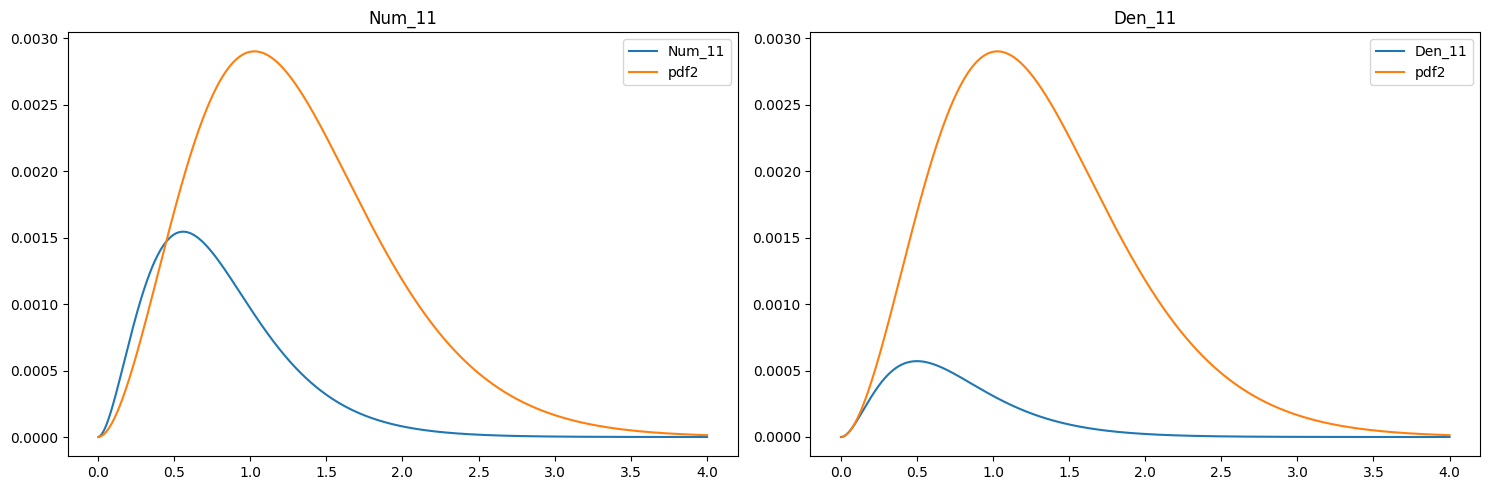

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_11_2d, Den_11_2d]
titles = ['Num_11', 'Den_11']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num11(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_11_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den11(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_11_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.65, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

num_samples = 100000  # Total number of samples
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
range_value = [0.275, 0.275, 0.275]
std = 0.225
num_processes = 4  # Number of parallel processes

In [ ]:
# # Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_11 = monte_carlo_integration(samples_p2, p2, Num11, Den11)[0]
# Den_p2_11 = monte_carlo_integration(samples_p2, p2, Num11, Den11)[2]
# print(f"Estimated E using P2: {E_p2_11}")
# print(f"Denominator using P2: {Den_p2_11}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

# Call the parallel Monte Carlo function
values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num11, Den11, num_processes)
E_p2_11 = values
Den_p2_11 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_11)

Monte Carlo Integration Result: -2.8598526961044537


In [ ]:
## Orthogonal vectors
u1_p2 = Phi_1 / np.sqrt(Den_p2_11)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_11 = u1_p2*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_11)

In [ ]:
def S11_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_11_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# S_11_p2 = MCI(samples_p2, p2, S11_p2)
# print(f"Estimated S11 using P2: {S_11_p2}")

S_11_p2 = MCI_parallel(samples_p2, p2, S11_p2, num_processes)
print(f"Estimated S11 using P: {S_11_p2}")

Estimated S11 using P: 0.07742192790955932


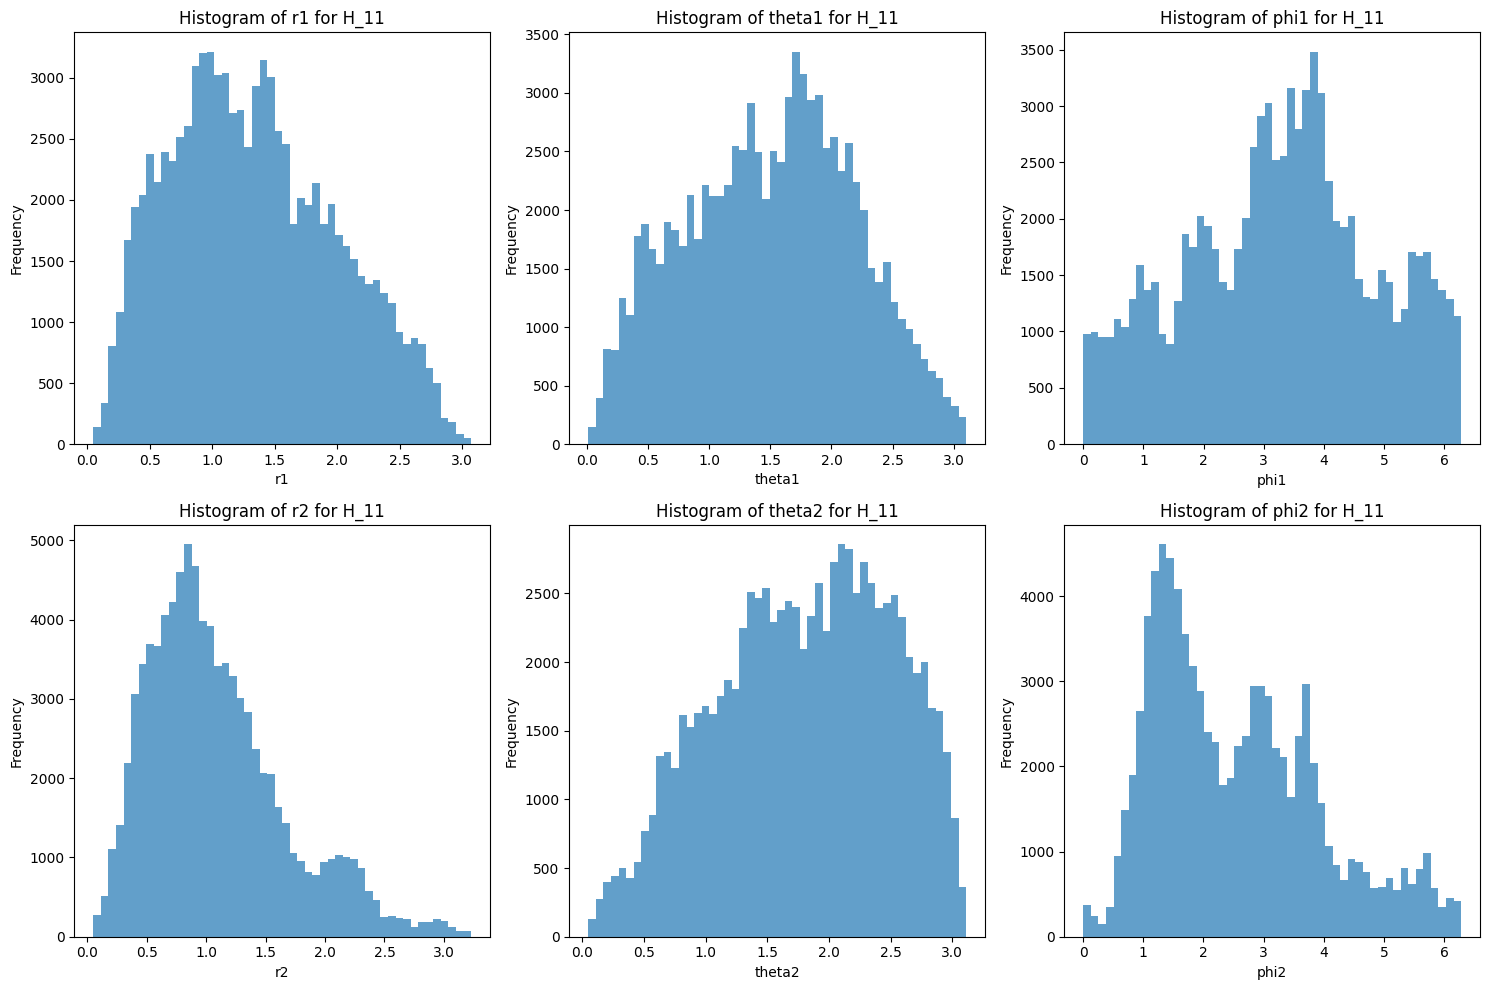

In [ ]:
# Plotting histograms for each of the variables to see the distribution of the samples.
## This is for pdf1 where samples were obtained from metropolis sampling1

variables = ['r1', 'theta1', 'phi1', 'r2', 'theta2', 'phi2']
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i in range(6):
    axs[i].hist(samples_p2[:, i], bins=50, alpha=0.7)
    axs[i].set_title(f'Histogram of {variables[i]} for H_11')
    axs[i].set_xlabel(variables[i])
    axs[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

## H_12

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)
H_Phi2 = Hamiltonian_modified.subs(Psi, Phi_2).simplify()

Num_12 = (Phi_1 * H_Phi2) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_12 = (Phi_1*Phi_2) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_12_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_12)
Den_12_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_12)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_12_2d = Num_12_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_12_2d = Den_12_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-5>:2: RuntimeWarning: invalid value encountered in divide
  return (1.0*r1**3*r2**2/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 2.0*r1**3*r2 + 1.0*r1**2*r2**3/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 4.0*r1**2*r2**2*(r1 + r2 - 1)*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2) - 4.0*r1**2*r2**2 - 1.0*r1**2*r2*(-2*(r1 + r2)*exp(-2*r1 - 2*r2) + exp(-2*r1 - 2*r2))*exp(2*r1 + 2*r2) - 2.0*r1*r2**3 - 1.0*r1*r2**2*(-2*(r1 + r2)*exp(-2*r1 - 2*r2) + exp(-2*r1 - 2*r2))*exp(2*r1 + 2*r2))*exp(-4*r1 - 4*r2)*sin(theta1)*sin(theta2)


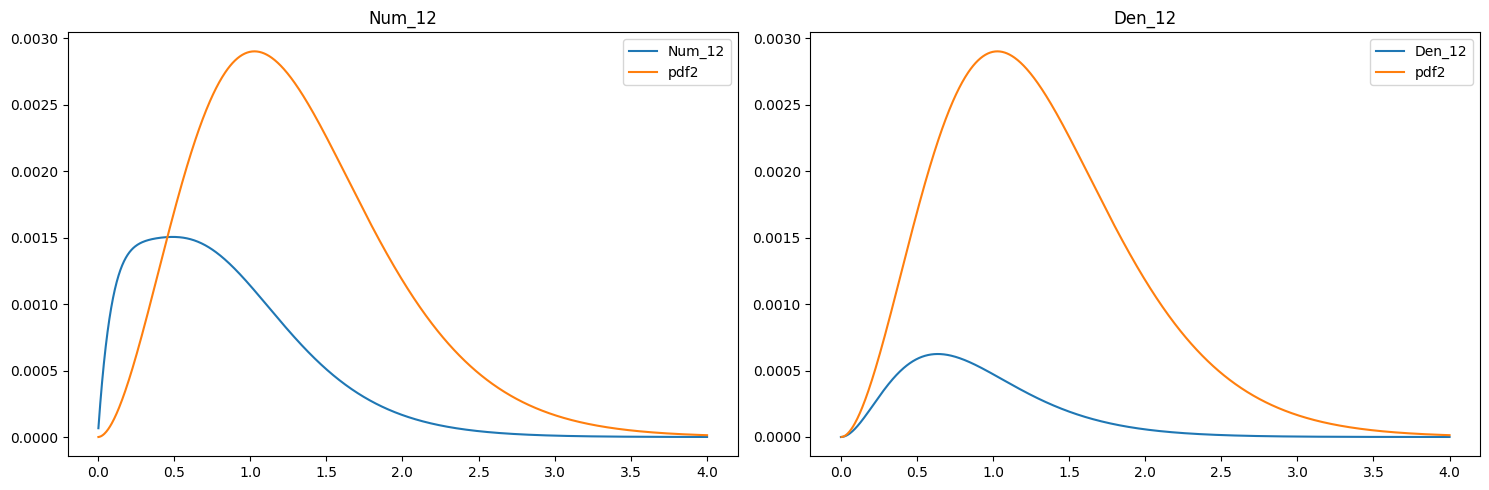

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_12_2d, Den_12_2d]
titles = ['Num_12', 'Den_12']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num12(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_12_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den12(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_12_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# # Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_12 = monte_carlo_integration(samples_p2, p2, Num12, Den12)[0]
# Den_p2_12 = monte_carlo_integration(samples_p2, p2, Num12, Den12)[2]
# print(f"Estimated E using P2: {E_p2_12}")
# print(f"Denominator using P2: {Den_p2_12}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num12, Den12, num_processes)
E_p2_12 = values
Den_p2_12 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_12)

Monte Carlo Integration Result: -2.970221767752547


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_12 = u1_p2*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_12_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_12)

In [ ]:
def S12_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_12_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_12_p2 = MCI_parallel(samples_p2, p2, S12_p2, num_processes)
print(f"Estimated S12 using P2: {S_12_p2}")

Estimated S12 using P2: 0.11717450072943719


## H_13

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)
H_Phi3 = Hamiltonian_modified.subs(Psi, Phi_3).simplify()

Num_13 = (Phi_1 * H_Phi3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_13 = (Phi_1*Phi_3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_13_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_13, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_13_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_13)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_13_2d = Num_13_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_13_2d = Den_13_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-8>:2: RuntimeWarning: divide by zero encountered in divide
  return r1**2*r2**2*(-0.5*r1**2*((sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + (sin(theta1)*cos(theta2)*cos(phi1 - phi2) - sin(theta2)*cos(theta1))**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 0.5*r1**2*(cos(phi1 - phi2)/(abs(r1)*abs(r2)) + sin(theta1)*sin(theta2)*sin(phi1 - phi2)**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*sin(theta1)/(sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*ab

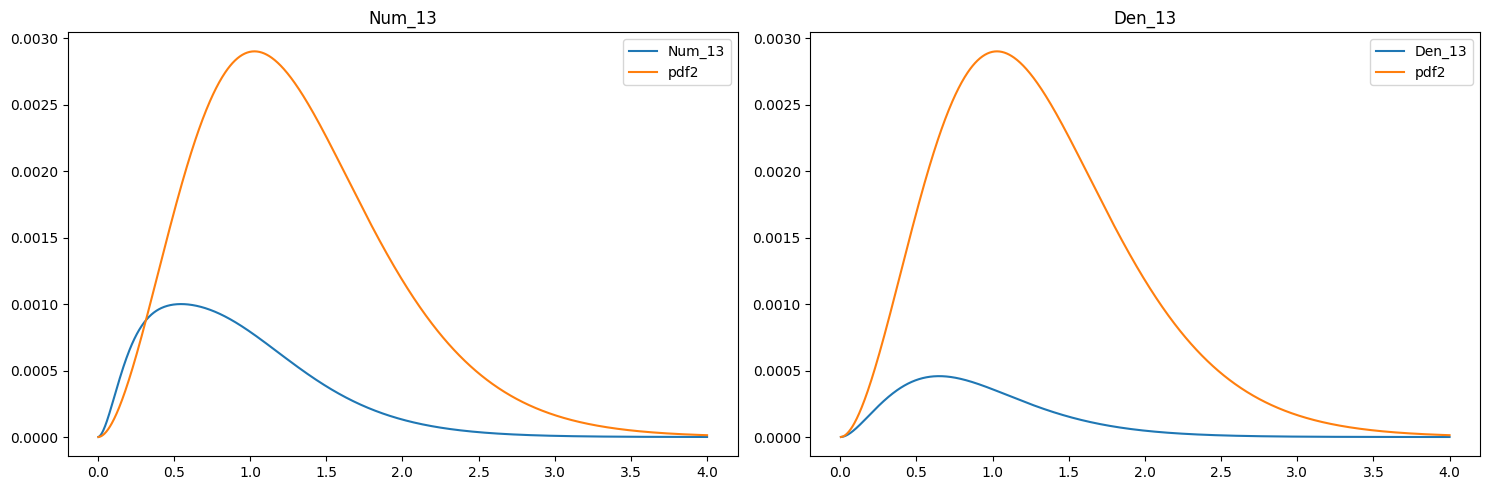

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_13_2d, Den_13_2d]
titles = ['Num_13', 'Den_13']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num13(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_13_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den13(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_13_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_13 = monte_carlo_integration(samples_p2, p2, Num13, Den13)[0]
# Den_p2_13 = monte_carlo_integration(samples_p2, p2, Num13, Den13)[2]
# print(f"Estimated E using P2: {E_p2_13}")
# print(f"Denominator using P2: {Den_p2_13}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num13, Den13, num_processes)
E_p2_13 = values
Den_p2_13 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_13)

Monte Carlo Integration Result: -2.7955953308021306


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_13 = u1_p2*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_13_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_13)

In [ ]:
def S13_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_13_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_13_p2 = MCI_parallel(samples_p2, p2, S13_p2, num_processes)
print(f"Estimated S13 using P2: {S_13_p2}")

Estimated S13 using P2: 0.08773400166471067


## H_14

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)
H_Phi4 = Hamiltonian_modified.subs(Psi, Phi_4).simplify()

Num_14 = (Phi_1 * H_Phi4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_14 = (Phi_1*Phi_4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_14_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_14)
Den_14_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_14)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_14_2d = Num_14_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_14_2d = Den_14_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-11>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*(1.0*r1*r2*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 2.0*r1*(r2 - 1)*exp(-2*r1 - 2*r2) - 2.0*r1*exp(-2*r1 - 2*r2) - 2.0*r2*(r1 - 1)*exp(-2*r1 - 2*r2) - 2.0*r2*exp(-2*r1 - 2*r2) - 1.0*(-2*r1*r2*exp(-2*r1 - 2*r2) + r1*exp(-2*r1 - 2*r2))/r2 - 1.0*(-2*r1*r2*exp(-2*r1 - 2*r2) + r2*exp(-2*r1 - 2*r2))/r1)*exp(-2*r1 - 2*r2)*sin(theta1)*sin(theta2)
<lambdifygenerated-11>:2: RuntimeWarning: divide by zero encountered in divide
  return r1**2*r2**2*(1.0*r1*r2*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 2.0*r1*(r2 - 1)*exp(-2*r1 - 2*r2) - 2.0*r1*exp(-2*r1 - 2*r2) - 2.0*r2*(r1 - 1)*exp(-2*r1 - 2*r2) - 2.0*r2*exp(-2*r1 - 2*r2) - 1.0*(-2*r1*r2*ex

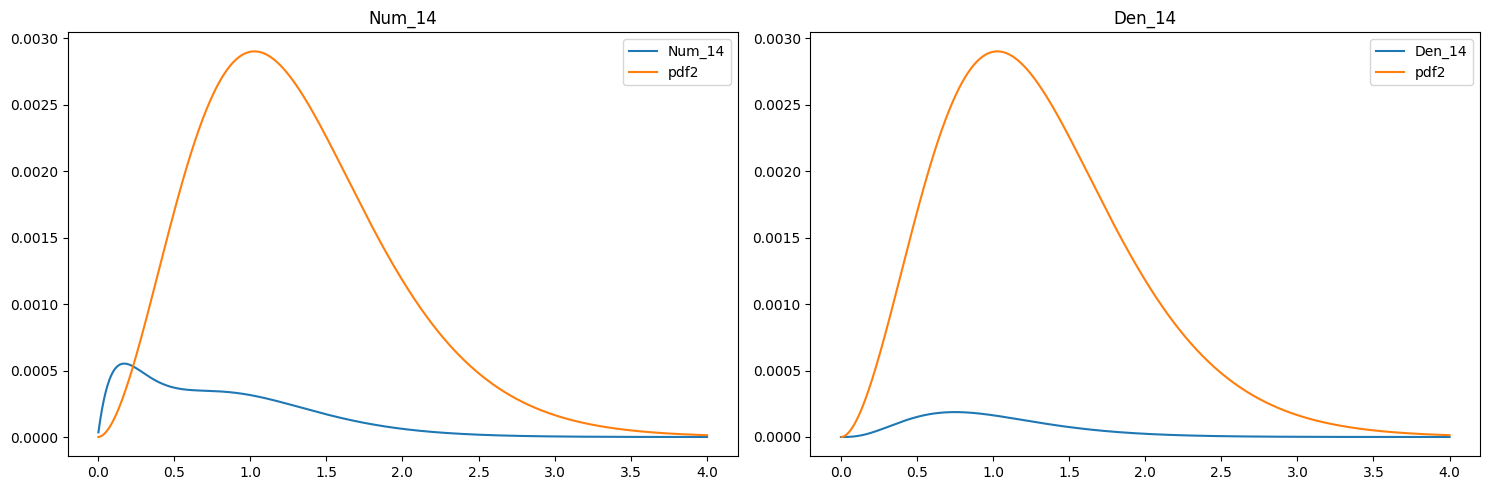

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_14_2d, Den_14_2d]
titles = ['Num_14', 'Den_14']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num14(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_14_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den14(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_14_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# # Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_14 = monte_carlo_integration(samples_p2, p2, Num14, Den14)[0]
# Den_p2_14 = monte_carlo_integration(samples_p2, p2, Num14, Den14)[2]
# print(f"Estimated E using P2: {E_p2_14}")
# print(f"Denominator using P2: {Den_p2_14}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num14, Den14, num_processes)
E_p2_14 = values
Den_p2_14 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_14)

Monte Carlo Integration Result: -2.9096522957122692


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_14 = u1_p2*Phi_4 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_14_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_14)

In [ ]:
def S14_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_14_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_14_p2 = MCI_parallel(samples_p2, p2, S14_p2, num_processes)
print(f"Estimated S14 using P2: {S_14_p2}")

Estimated S14 using P2: 0.04519550392809381


## H_15

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)
H_Phi5 = Hamiltonian_modified.subs(Psi, Phi_5).simplify()

Num_15 = (Phi_1 * H_Phi5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_15 = (Phi_1*Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_15_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_15)
Den_15_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_15)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_15_2d = Num_15_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_15_2d = Den_15_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-14>:2: RuntimeWarning: invalid value encountered in divide
  return (1.0*r1**4*r2**2/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 2.0*r1**4*r2 + 2.0*r1**3*r2**3/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 6.0*r1**3*r2**2 + 1.0*r1**2*r2**4/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 6.0*r1**2*r2**3 - 2.0*r1**2*r2**2*(-4*(r1 + r2)*exp(-2*r1 - 2*r2) + 2*(r1**2 + 2*r1*r2 + r2**2)*exp(-2*r1 - 2*r2) + exp(-2*(r1 + r2)))*exp(2*r1 + 2*r2) - 1.0*r1**2*r2*((2*r1 + 2*r2)*exp(-2*r1 - 2*r2) - 2*(r1**2 + 2*r1*r2 + r2**2)*exp(-2*r1 - 2*r2))*exp(2*r1 + 2*r2) - 2.0*r1*r2**4 - 1.0*r1*r2**2*((2*r1 + 2*r2)*exp(-2*r1 - 2*r2) - 2*(r1**2 + 2*r1*r2 + r2**2)*exp(

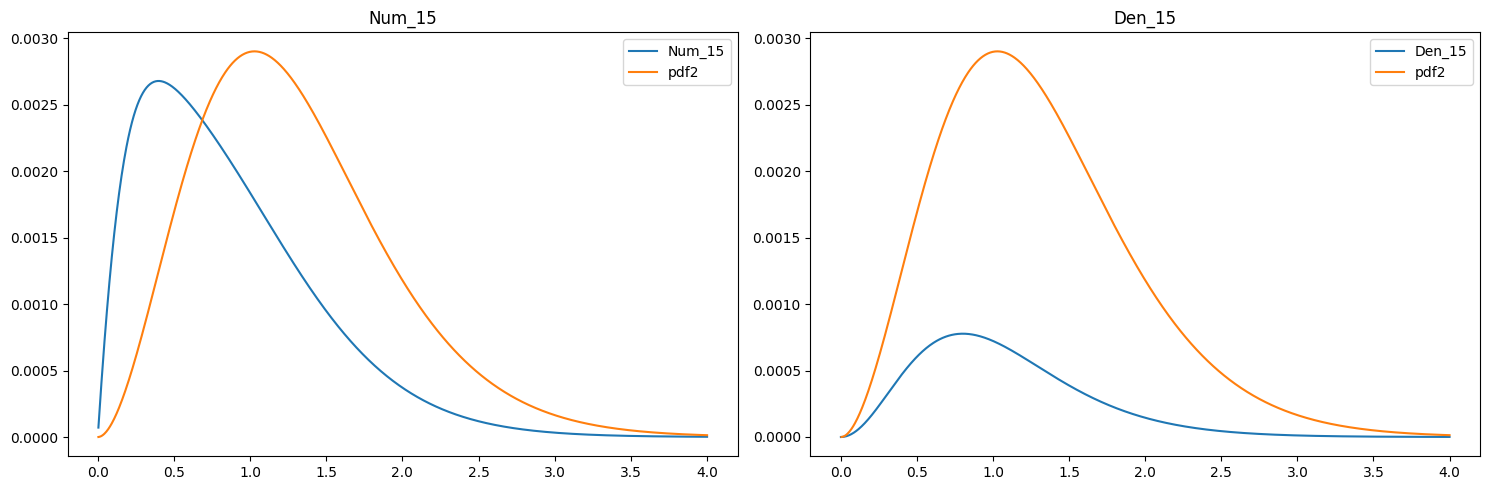

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_15_2d, Den_15_2d]
titles = ['Num_15', 'Den_15']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num15(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_15_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den15(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_15_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# # Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_15 = monte_carlo_integration(samples_p2, p2, Num15, Den15)[0]
# Den_p2_15 = monte_carlo_integration(samples_p2, p2, Num15, Den15)[2]
# print(f"Estimated E using P2: {E_p2_15}")
# print(f"Denominator using P2: {Den_p2_15}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num15, Den15, num_processes)
E_p2_15 = values
Den_p2_15 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_15)

Monte Carlo Integration Result: -3.0455317928500003


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_15 = u1_p2*Phi_5 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_15_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_15)

In [ ]:
def S15_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_15_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_15_p2 = MCI_parallel(samples_p2, p2, S15_p2, num_processes)
print(f"Estimated S15 using P2: {S_15_p2}")

Estimated S15 using P2: 0.21159087784325165


## H_16

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)
H_Phi6 = Hamiltonian_modified.subs(Psi, Phi_6).simplify()

Num_16 = (Phi_1 * H_Phi6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_16 = (Phi_1*Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_16_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_16, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_16_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_16)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_16_2d = Num_16_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_16_2d = Den_16_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-17>:2: RuntimeWarning: invalid value encountered in divide
  return -(1.0*r1**4*r2**2*sqrt(r1**2 + r2**2 - 2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*abs(r1*r2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)*sin(theta1)**3*sin(theta2)*cos(phi1 - phi2) + 1.0*r1**2*r2**4*sqrt(r1**2 + r2**2 - 2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*abs(r1*r2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)*sin(theta1)*sin(theta2)**3*cos(phi1 - phi2) + r1**2*r2*sqrt(r1**2 + r2**2 - 2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*abs(r1*r2))*(1.0*r2*(-2*(2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2)) - (r1**2 + r2**2)*abs(r1*r2))/abs(r1*r2) - 2*(-4*r1**2*r2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2)) + r1*(r1**2 + r2**2)*sign(r1*r2) + 2*r2*abs(r1*r2))/abs(r1*r2) + (r1**2*(r1**2 + r2**2)*DiracDelta(r1*r2) - 2*r1**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*c

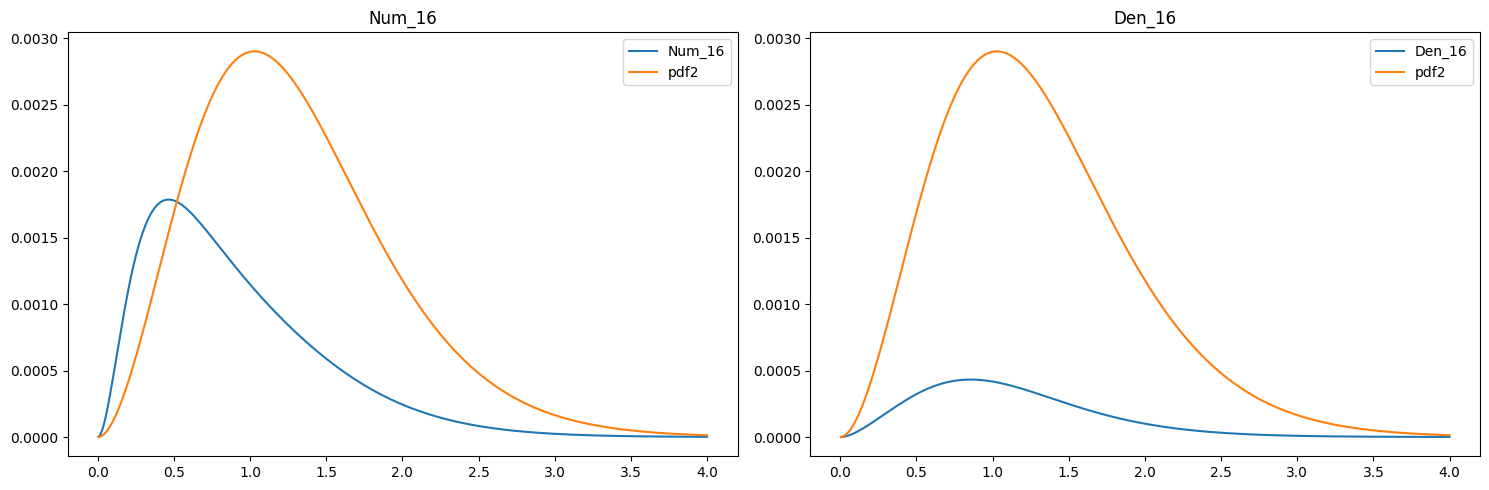

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_16_2d, Den_16_2d]
titles = ['Num_16', 'Den_16']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num16(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_16_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den16(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_16_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# # Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_16 = monte_carlo_integration(samples_p2, p2, Num16, Den16)[0]
# Den_p2_16 = monte_carlo_integration(samples_p2, p2, Num16, Den16)[2]
# print(f"Estimated E using P2: {E_p2_16}")
# print(f"Denominator using P2: {Den_p2_16}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num16, Den16, num_processes)
E_p2_16 = values
Den_p2_16 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_16)

Monte Carlo Integration Result: -3.0767973748593618


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_16 = u1_p2*Phi_6 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_16_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_16)

In [ ]:
def S16_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_16_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_16_p2 = MCI_parallel(samples_p2, p2, S16_p2, num_processes)
print(f"Estimated S16 using P2: {S_16_p2}")

Estimated S16 using P2: 0.1249488411306053


## H_17

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)
H_Phi7 = Hamiltonian_modified.subs(Psi, Phi_7).simplify()

Num_17 = (Phi_1 * H_Phi7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_17 = (Phi_1*Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_17_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_17, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_17_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_17)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_17_2d = Num_17_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_17_2d = Den_17_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-20>:2: RuntimeWarning: divide by zero encountered in divide
  return (-0.5*r1**4*r2**2*(r1 + r2)*((sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + (sin(theta1)*cos(theta2)*cos(phi1 - phi2) - sin(theta2)*cos(theta1))**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 0.5*r1**4*r2**2*(r1 + r2)*(cos(phi1 - phi2)/(abs(r1)*abs(r2)) + sin(theta1)*sin(theta2)*sin(phi1 - phi2)**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)*sin(theta1)/(sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r

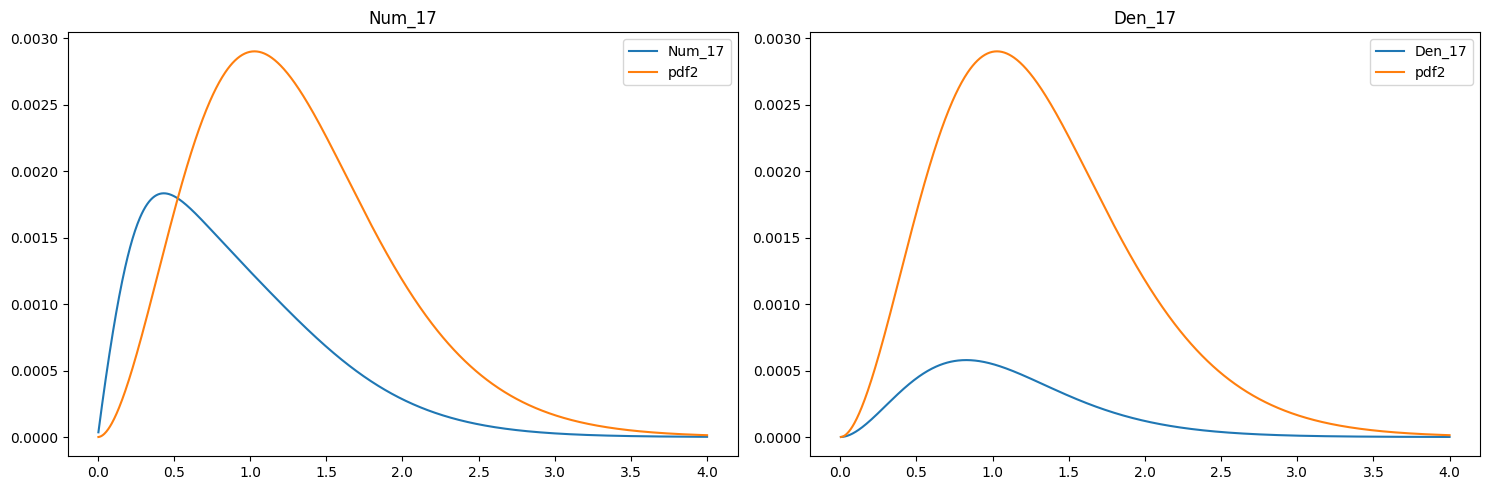

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_17_2d, Den_17_2d]
titles = ['Num_17', 'Den_17']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num17(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_17_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den17(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_17_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_17 = monte_carlo_integration(samples_p2, p2, Num17, Den17)[0]
# Den_p2_17 = monte_carlo_integration(samples_p2, p2, Num17, Den17)[2]
# print(f"Estimated E using P2: {E_p2_17}")
# print(f"Denominator using P2: {Den_p2_17}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num17, Den17, num_processes)
E_p2_17 = values
Den_p2_17 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_17)

Monte Carlo Integration Result: -2.961069117805548


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_17 = u1_p2*Phi_7 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_17_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_17)

In [ ]:
def S17_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_17_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_17_p2 = MCI_parallel(samples_p2, p2, S17_p2, num_processes)
print(f"Estimated S17 using P2: {S_17_p2}")

Estimated S17 using P2: 0.15803063921897578


## H_22

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_22 = (Phi_2 * H_Phi2) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_22 = (Phi_2*Phi_2) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_22_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_22)
Den_22_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_22)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_22_2d = Num_22_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_22_2d = Den_22_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-23>:2: RuntimeWarning: invalid value encountered in divide
  return (r1 + r2)*(1.0*r1**3*r2**2/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 2.0*r1**3*r2 + 1.0*r1**2*r2**3/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 4.0*r1**2*r2**2*(r1 + r2 - 1)*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2) - 4.0*r1**2*r2**2 - 1.0*r1**2*r2*(-2*(r1 + r2)*exp(-2*r1 - 2*r2) + exp(-2*r1 - 2*r2))*exp(2*r1 + 2*r2) - 2.0*r1*r2**3 - 1.0*r1*r2**2*(-2*(r1 + r2)*exp(-2*r1 - 2*r2) + exp(-2*r1 - 2*r2))*exp(2*r1 + 2*r2))*exp(-4*r1 - 4*r2)*sin(theta1)*sin(theta2)


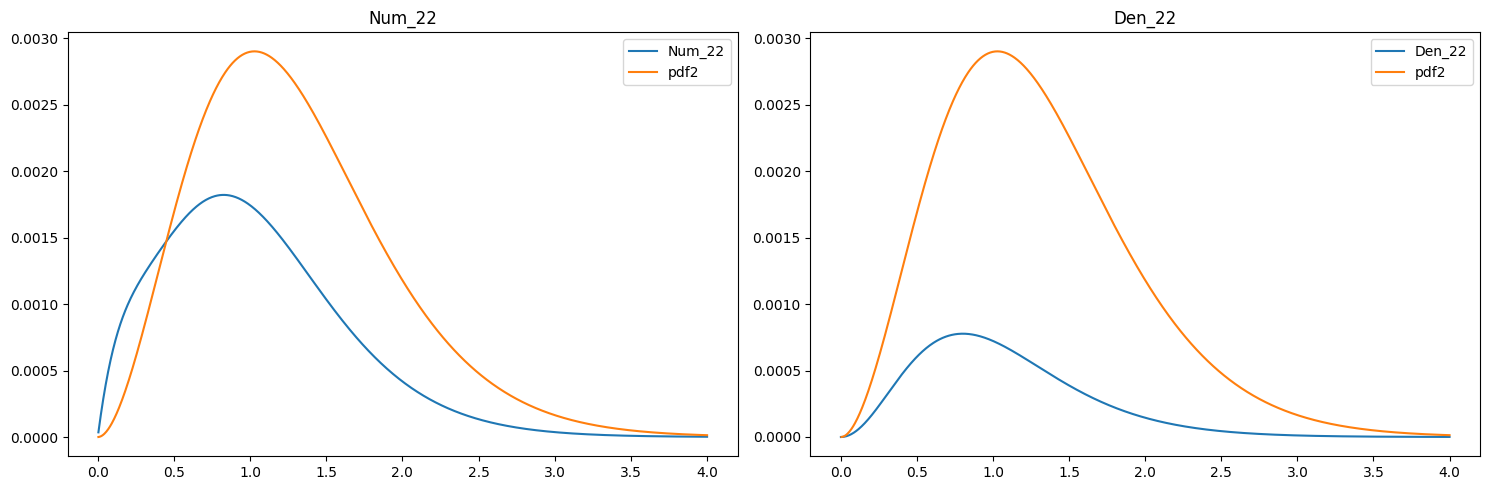

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_22_2d, Den_22_2d]
titles = ['Num_22', 'Den_22']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num22(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_22_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den22(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_22_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_22 = monte_carlo_integration(samples_p2, p2, Num22, Den22)[0]
# print(f"Estimated E using P2: {E_p2_22}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num22, Den22, num_processes)
E_p2_22 = values
Den_p2_22 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_22)

Monte Carlo Integration Result: -2.7621854630639717


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_2*u1_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
# samples_p2 = samples_p2[burn_in:]

I_p2 = MCI_parallel(samples_p2, p2, Num_p2, num_processes)

In [ ]:
u2_p2 = Phi_2 - (u1_p2 * I_p2)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Norm__p2 = u2_p2*u2_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Norm_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Norm__p2)

def Norm_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Norm_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

I2 = MCI_parallel(samples_p2, p2, Norm_p2, num_processes)

In [ ]:
u2_p2 = u2_p2 / np.sqrt(I2)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_21 = u2_p2*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_22 = u2_p2*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_21_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_21)
S_p2_22_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_22)

In [ ]:
def S21_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_21_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
def S22_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_22_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_21_p2 = MCI_parallel(samples_p2, p2, S21_p2, num_processes)
S_22_p2 = MCI_parallel(samples_p2, p2, S22_p2, num_processes)

print(f"Estimated S21 using P2: {S_21_p2}")
print(f"Estimated S22 using P2: {S_22_p2}")

Estimated S21 using P2: -0.0029626172946967044
Estimated S22 using P2: 0.04654336128271486


## H_23

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_23 = (Phi_2 * H_Phi3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_23 = (Phi_2*Phi_3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_23_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_23, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_23_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_23)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_23_2d = Num_23_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_23_2d = Den_23_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-29>:2: RuntimeWarning: divide by zero encountered in divide
  return r1**2*r2**2*(r1 + r2)*(-0.5*r1**2*((sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + (sin(theta1)*cos(theta2)*cos(phi1 - phi2) - sin(theta2)*cos(theta1))**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 0.5*r1**2*(cos(phi1 - phi2)/(abs(r1)*abs(r2)) + sin(theta1)*sin(theta2)*sin(phi1 - phi2)**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*sin(theta1)/(sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/

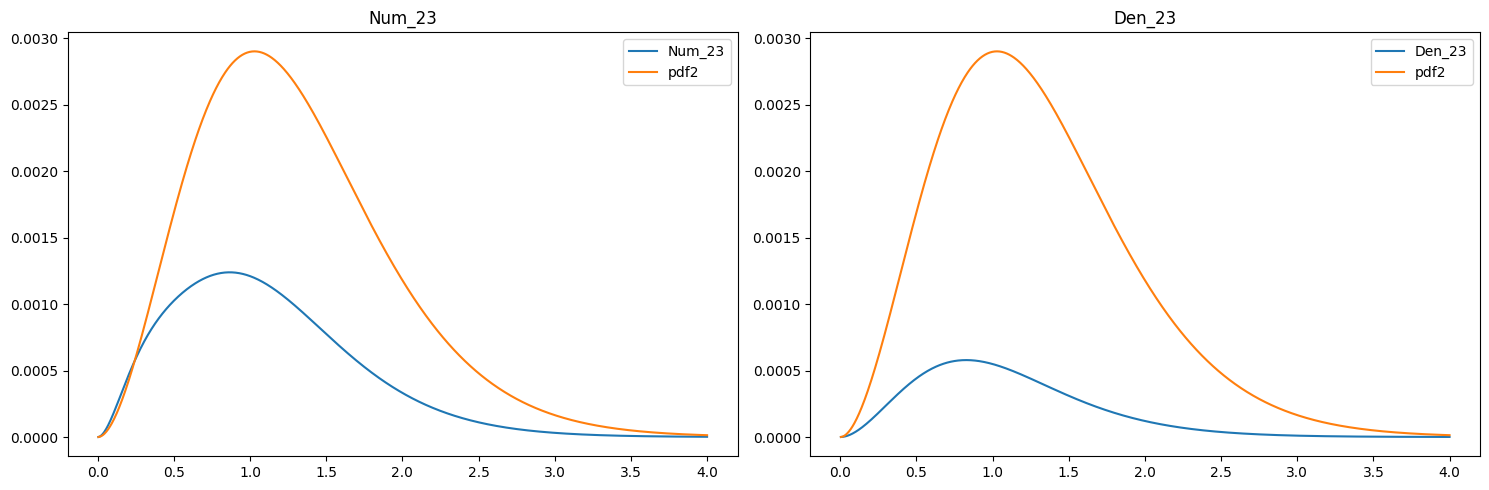

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_23_2d, Den_23_2d]
titles = ['Num_23', 'Den_23']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num23(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_23_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den23(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_23_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_23 = monte_carlo_integration(samples_p2, p2, Num23, Den23)[0]
# print(f"Estimated E using P2: {E_p2_23}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num23, Den23, num_processes)
E_p2_23 = values
Den_p2_23 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_23)

Monte Carlo Integration Result: -2.7156647191351073


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_23 = u2_p2*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_23_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_23)

In [ ]:
def S23_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_23_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_23_p2 = MCI_parallel(samples_p2, p2, S23_p2, num_processes)
print(f"Estimated S23 using P2: {S_23_p2}")

Estimated S23 using P2: 0.034257315547523925


## H_24

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_24 = (Phi_2 * H_Phi4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_24 = (Phi_2*Phi_4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_24_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_24)
Den_24_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_24)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_24_2d = Num_24_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_24_2d = Den_24_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-32>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*(r1 + r2)*(1.0*r1*r2*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 2.0*r1*(r2 - 1)*exp(-2*r1 - 2*r2) - 2.0*r1*exp(-2*r1 - 2*r2) - 2.0*r2*(r1 - 1)*exp(-2*r1 - 2*r2) - 2.0*r2*exp(-2*r1 - 2*r2) - 1.0*(-2*r1*r2*exp(-2*r1 - 2*r2) + r1*exp(-2*r1 - 2*r2))/r2 - 1.0*(-2*r1*r2*exp(-2*r1 - 2*r2) + r2*exp(-2*r1 - 2*r2))/r1)*exp(-2*r1 - 2*r2)*sin(theta1)*sin(theta2)
<lambdifygenerated-32>:2: RuntimeWarning: divide by zero encountered in divide
  return r1**2*r2**2*(r1 + r2)*(1.0*r1*r2*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 2.0*r1*(r2 - 1)*exp(-2*r1 - 2*r2) - 2.0*r1*exp(-2*r1 - 2*r2) - 2.0*r2*(r1 - 1)*exp(-2*r1 - 2*r2) - 2.0*r2*exp(-2*r1 - 2*r2

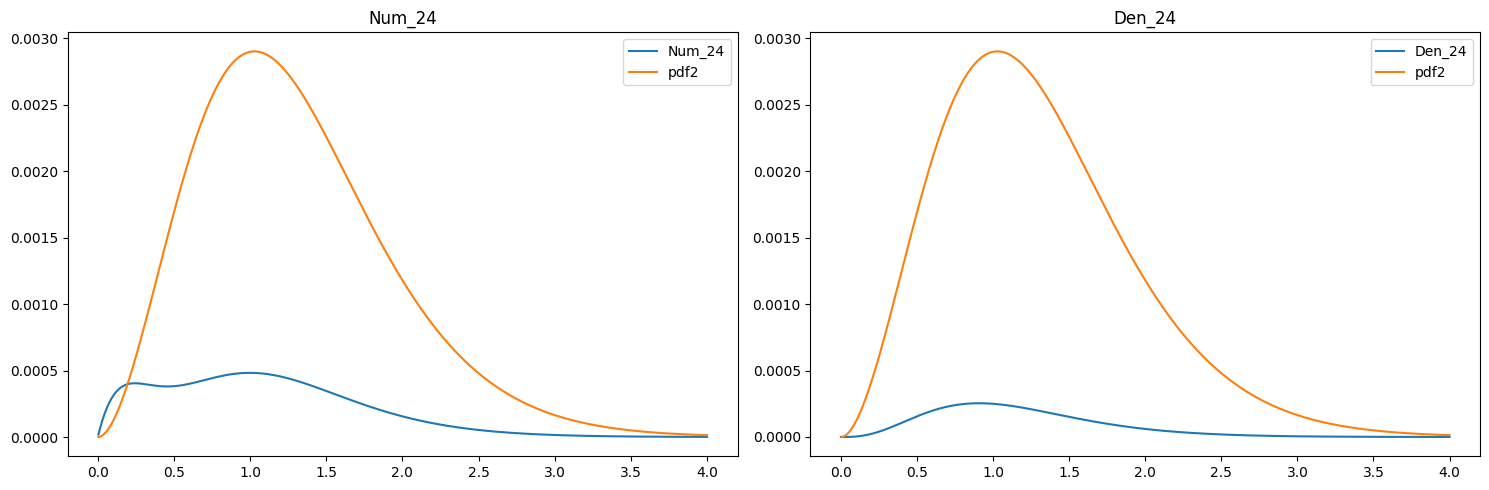

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_24_2d, Den_24_2d]
titles = ['Num_24', 'Den_24']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num24(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_24_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den24(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_24_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_24 = monte_carlo_integration(samples_p2, p2, Num24, Den24)[0]
# print(f"Estimated E using P2: {E_p2_24}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num24, Den24, num_processes)
E_p2_24 = values
Den_p2_24 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_24)

Monte Carlo Integration Result: -2.45223436728932


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_24 = u2_p2*Phi_4 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_24_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_24)

In [ ]:
def S24_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_24_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_24_p2 = MCI_parallel(samples_p2, p2, S24_p2, num_processes)
print(f"Estimated S24 using P2: {S_24_p2}")

Estimated S24 using P2: 0.03646915631203622


## H_25

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_25 = (Phi_2 * H_Phi5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_25 = (Phi_2*Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_25_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_25)
Den_25_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_25)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_25_2d = Num_25_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_25_2d = Den_25_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-35>:2: RuntimeWarning: invalid value encountered in divide
  return (r1 + r2)*(1.0*r1**4*r2**2/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 2.0*r1**4*r2 + 2.0*r1**3*r2**3/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 6.0*r1**3*r2**2 + 1.0*r1**2*r2**4/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 6.0*r1**2*r2**3 - 2.0*r1**2*r2**2*(-4*(r1 + r2)*exp(-2*r1 - 2*r2) + 2*(r1**2 + 2*r1*r2 + r2**2)*exp(-2*r1 - 2*r2) + exp(-2*(r1 + r2)))*exp(2*r1 + 2*r2) - 1.0*r1**2*r2*((2*r1 + 2*r2)*exp(-2*r1 - 2*r2) - 2*(r1**2 + 2*r1*r2 + r2**2)*exp(-2*r1 - 2*r2))*exp(2*r1 + 2*r2) - 2.0*r1*r2**4 - 1.0*r1*r2**2*((2*r1 + 2*r2)*exp(-2*r1 - 2*r2) - 2*(r1**2 + 2*r1*r2 + r

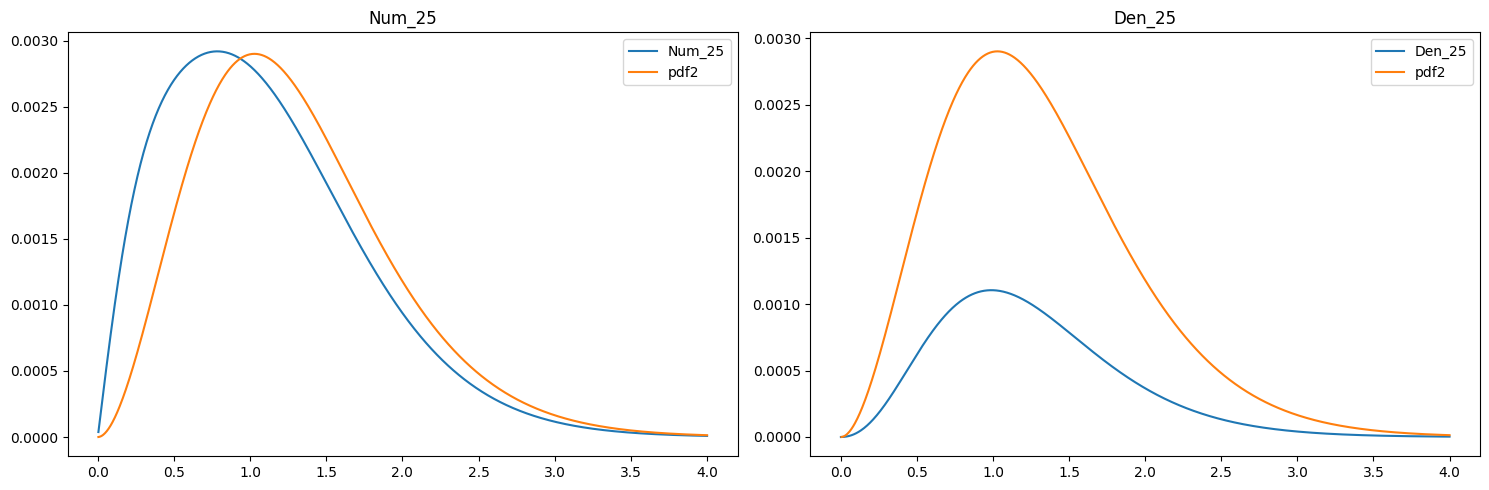

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_25_2d, Den_25_2d]
titles = ['Num_25', 'Den_25']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num25(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_25_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den25(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_25_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_25 = monte_carlo_integration(samples_p2, p2, Num25, Den25)[0]
# print(f"Estimated E using P2: {E_p2_25}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num25, Den25, num_processes)
E_p2_25 = values
Den_p2_25 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_25)

Monte Carlo Integration Result: -2.611354194523278


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_25 = u2_p2*Phi_5 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_25_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_25)

In [ ]:
def S25_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_25_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_25_p2 = MCI_parallel(samples_p2, p2, S25_p2, num_processes)
print(f"Estimated S25 using P2: {S_25_p2}")

Estimated S25 using P2: 0.1726626322860556


## H_26

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_26 = (Phi_2 * H_Phi6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_26 = (Phi_2*Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_26_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_26, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_26_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_26)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_26_2d = Num_26_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_26_2d = Den_26_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-38>:2: RuntimeWarning: invalid value encountered in divide
  return -(r1 + r2)*(1.0*r1**4*r2**2*sqrt(r1**2 + r2**2 - 2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*abs(r1*r2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)*sin(theta1)**3*sin(theta2)*cos(phi1 - phi2) + 1.0*r1**2*r2**4*sqrt(r1**2 + r2**2 - 2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*abs(r1*r2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)*sin(theta1)*sin(theta2)**3*cos(phi1 - phi2) + r1**2*r2*sqrt(r1**2 + r2**2 - 2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*abs(r1*r2))*(1.0*r2*(-2*(2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2)) - (r1**2 + r2**2)*abs(r1*r2))/abs(r1*r2) - 2*(-4*r1**2*r2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2)) + r1*(r1**2 + r2**2)*sign(r1*r2) + 2*r2*abs(r1*r2))/abs(r1*r2) + (r1**2*(r1**2 + r2**2)*DiracDelta(r1*r2) - 2*r1**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos

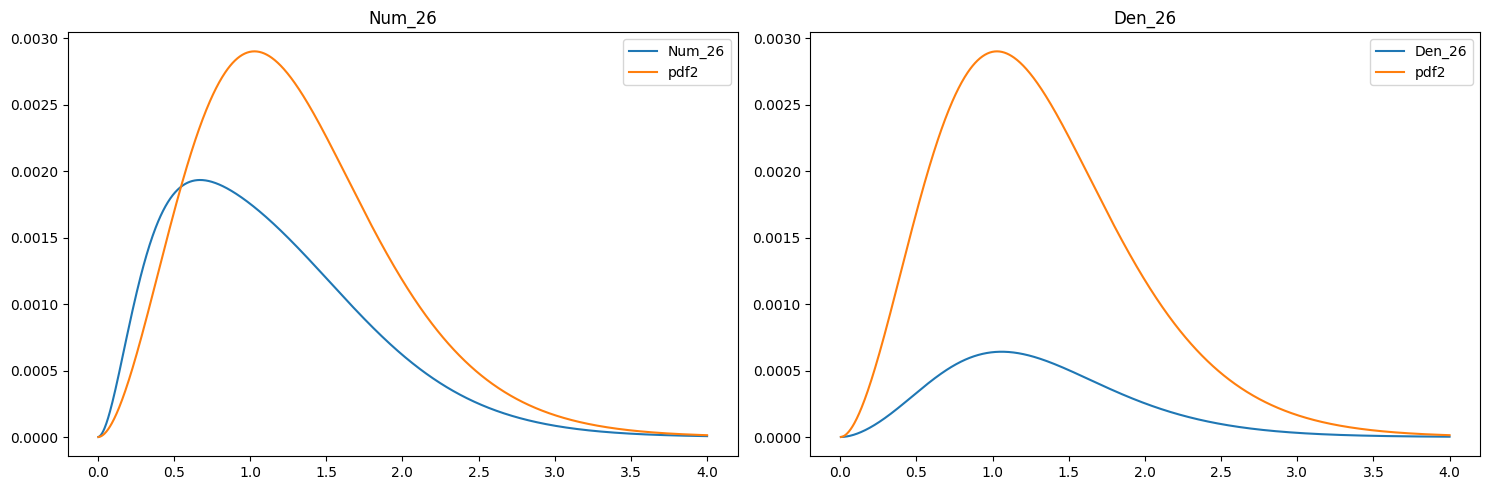

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_26_2d, Den_26_2d]
titles = ['Num_26', 'Den_26']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num26(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_26_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den26(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_26_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_26 = monte_carlo_integration(samples_p2, p2, Num26, Den26)[0]
# print(f"Estimated E using P2: {E_p2_26}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num26, Den26, num_processes)
E_p2_26 = values
Den_p2_26 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_26)

Monte Carlo Integration Result: -2.7168672318083873


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_26 = u2_p2*Phi_6 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_26_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_26)

In [ ]:
def S26_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_26_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_26_p2 = MCI_parallel(samples_p2, p2, S26_p2, num_processes)
print(f"Estimated S26 using P2: {S_26_p2}")

Estimated S26 using P2: 0.1016002258401379


## H_27

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_27 = (Phi_2 * H_Phi7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_27 = (Phi_2*Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_27_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_27, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_27_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_27)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_27_2d = Num_27_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_27_2d = Den_27_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-41>:2: RuntimeWarning: divide by zero encountered in divide
  return (r1 + r2)*(-0.5*r1**4*r2**2*(r1 + r2)*((sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + (sin(theta1)*cos(theta2)*cos(phi1 - phi2) - sin(theta2)*cos(theta1))**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 0.5*r1**4*r2**2*(r1 + r2)*(cos(phi1 - phi2)/(abs(r1)*abs(r2)) + sin(theta1)*sin(theta2)*sin(phi1 - phi2)**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)*sin(theta1)/(sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs

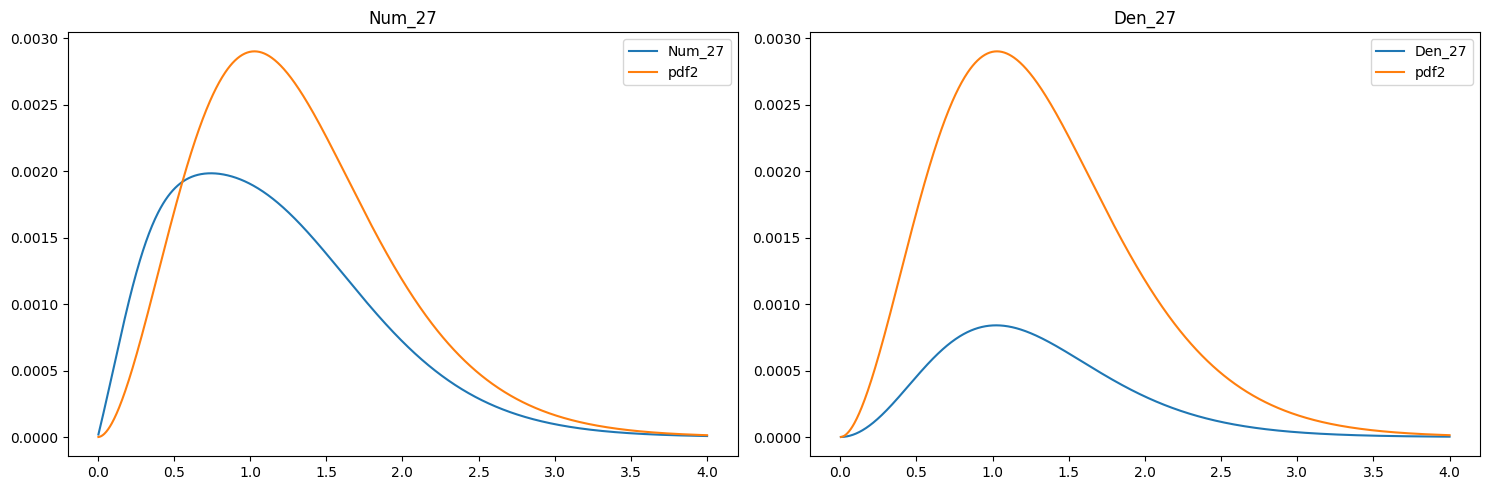

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_27_2d, Den_27_2d]
titles = ['Num_27', 'Den_27']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num27(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_27_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den27(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_27_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]


# E_p2_27 = monte_carlo_integration(samples_p2, p2, Num27, Den27)[0]
# print(f"Estimated E using P2: {E_p2_27}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num27, Den27, num_processes)
E_p2_27 = values
Den_p2_27 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_27)

Monte Carlo Integration Result: -2.615234175724427


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_27 = u2_p2*Phi_7 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_27_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_27)

In [ ]:
def S27_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_27_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_27_p2 = MCI_parallel(samples_p2, p2, S27_p2, num_processes)
print(f"Estimated S27 using P2: {S_27_p2}")

Estimated S27 using P2: 0.12719737344782833


## H_33

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_33 = (Phi_3 * H_Phi3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_33 = (Phi_3*Phi_3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_33_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_33, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_33_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_33)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_33_2d = Num_33_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_33_2d = Den_33_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-44>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*sqrt(r1**2 - 2*r1*r2*(r1*r2*sin(phi1)*sin(phi2)*sin(theta1)*sin(theta2) + r1*r2*sin(theta1)*sin(theta2)*cos(phi1)*cos(phi2) + r1*r2*cos(theta1)*cos(theta2))/(sqrt(r1**2*sin(phi1)**2*sin(theta1)**2 + r1**2*sin(theta1)**2*cos(phi1)**2 + r1**2*cos(theta1)**2)*sqrt(r2**2*sin(phi2)**2*sin(theta2)**2 + r2**2*sin(theta2)**2*cos(phi2)**2 + r2**2*cos(theta2)**2)) + r2**2)*(-0.5*r1**2*((sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + (sin(theta1)*cos(theta2)*cos(phi1 - phi2) - sin(theta2)*cos(theta1))**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 0.5*r1**2*(cos(phi1 - phi2)/(abs(r1)*

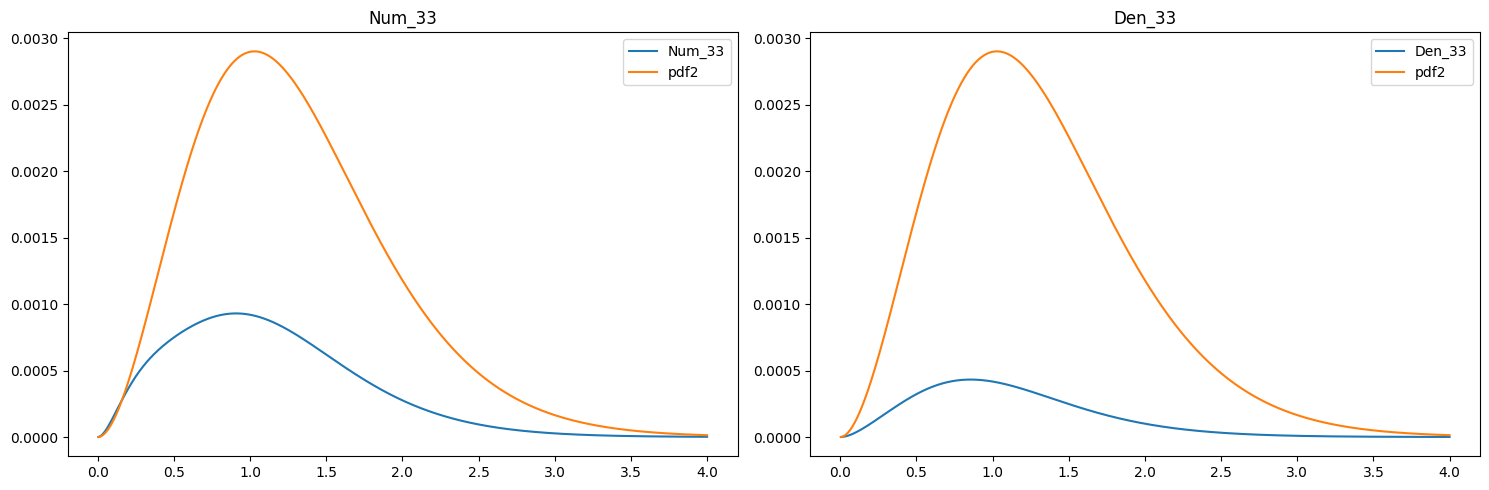

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_33_2d, Den_33_2d]
titles = ['Num_33', 'Den_33']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num33(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_33_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den33(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_33_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_33 = monte_carlo_integration(samples_p2, p2, Num33, Den33)[0]
# print(f"Estimated E using P2: {E_p2_33}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num33, Den33, num_processes)
E_p2_33 = values
Den_p2_33 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_33)

Monte Carlo Integration Result: -2.577299237568689


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_3*u1_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
# samples_p2 = samples_p2[burn_in:]

I1_p2 = MCI_parallel(samples_p2, p2, Num_p2, num_processes)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_3*u2_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
# samples_p2 = samples_p2[burn_in:]

I2_p2 = MCI_parallel(samples_p2, p2, Num_p2, num_processes)

In [ ]:
u3_p2 = Phi_3 - (I2_p2 * u2_p2) - (I1_p2 * u1_p2)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Norm__p2 = u3_p2*u3_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Norm_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Norm__p2)

def Norm_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Norm_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

I2 = MCI_parallel(samples_p2, p2, Norm_p2, num_processes)

In [ ]:
u3_p2 = u3_p2 / np.sqrt(I2)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_31 = u3_p2*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_32 = u3_p2*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_33 = u3_p2*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p2_31_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_31)
S_p2_32_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_32)
S_p2_33_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_33)

In [ ]:
def S31_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_31_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S32_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_32_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S33_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_33_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_31_p2 = MCI_parallel(samples_p2, p2, S31_p2, num_processes)
S_32_p2 = MCI_parallel(samples_p2, p2, S32_p2, num_processes)
S_33_p2 = MCI_parallel(samples_p2, p2, S33_p2, num_processes)

In [ ]:
print(f"Estimated S31 using P2: {S_31_p2}")
print(f"Estimated S32 using P2: {S_32_p2}")
print(f"Estimated S33 using P2: {S_33_p2}")

Estimated S31 using P2: -0.0005115733852270872
Estimated S32 using P2: 0.0067332042990656355
Estimated S33 using P2: 0.027651767696395296


## H_34

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_34 = (Phi_3 * H_Phi4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_34 = (Phi_3*Phi_4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_34_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_34)
Den_34_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_34)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_34_2d = Num_34_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_34_2d = Den_34_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-52>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*sqrt(r1**2 - 2*r1*r2*(r1*r2*sin(phi1)*sin(phi2)*sin(theta1)*sin(theta2) + r1*r2*sin(theta1)*sin(theta2)*cos(phi1)*cos(phi2) + r1*r2*cos(theta1)*cos(theta2))/(sqrt(r1**2*sin(phi1)**2*sin(theta1)**2 + r1**2*sin(theta1)**2*cos(phi1)**2 + r1**2*cos(theta1)**2)*sqrt(r2**2*sin(phi2)**2*sin(theta2)**2 + r2**2*sin(theta2)**2*cos(phi2)**2 + r2**2*cos(theta2)**2)) + r2**2)*(1.0*r1*r2*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 2.0*r1*(r2 - 1)*exp(-2*r1 - 2*r2) - 2.0*r1*exp(-2*r1 - 2*r2) - 2.0*r2*(r1 - 1)*exp(-2*r1 - 2*r2) - 2.0*r2*exp(-2*r1 - 2*r2) - 1.0*(-2*r1*r2*exp(-2*r1 - 2*r2) + r1*exp(-2*r1 - 2*r2))/r2 - 1.0*(-2*r1*r2*exp(-2*r1 - 2*r2) + r2*exp(-2*r1 - 2*r2))/r1)*exp(-2*r1 - 2*r2)*sin(theta1)*sin(theta2)
<lambdifygenerated-52>:2: RuntimeWarning: divide by zero enco

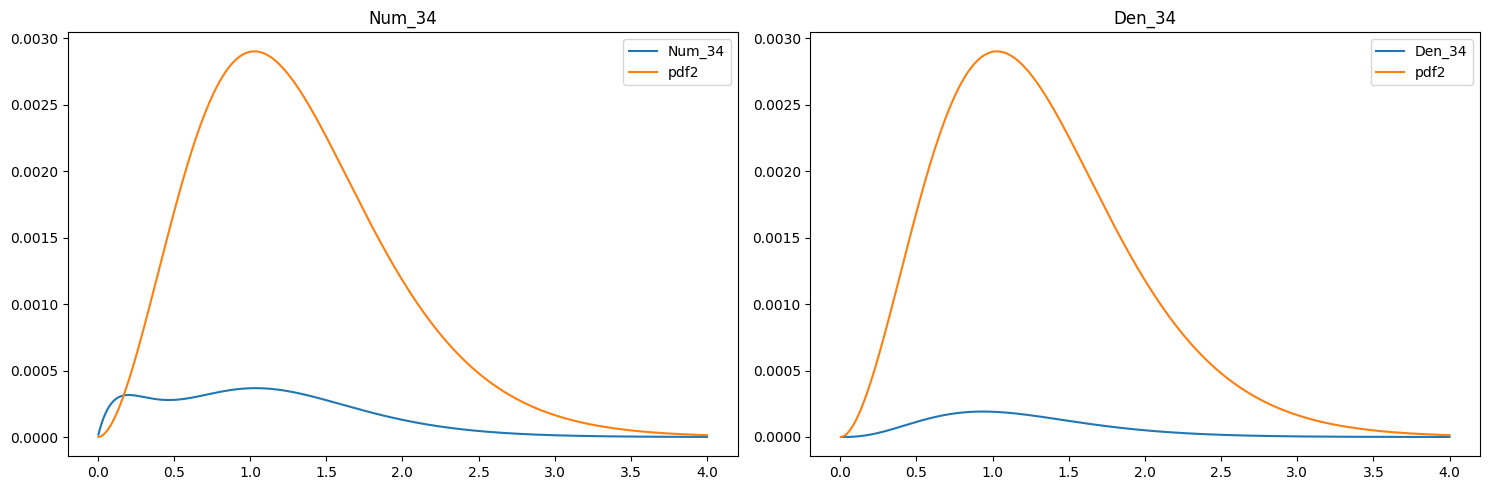

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_34_2d, Den_34_2d]
titles = ['Num_34', 'Den_34']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num34(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_34_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den34(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_34_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_34 = monte_carlo_integration(samples_p2, p2, Num34, Den34)[0]
# print(f"Estimated E using P2: {E_p2_34}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num34, Den34, num_processes)
E_p2_34 = values
Den_p2_34 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_34)

Monte Carlo Integration Result: -2.6629066342163075


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_34 = u3_p2*Phi_4 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_34_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_34)

In [ ]:
def S34_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_34_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_34_p2 = MCI_parallel(samples_p2, p2, S34_p2, num_processes)
print(f"Estimated S34 using P2: {S_34_p2}")

Estimated S34 using P2: 0.0015063390974339474


## H_35

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_35 = (Phi_3 * H_Phi5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_35 = (Phi_3*Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_35_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_35)
Den_35_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_35)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_35_2d = Num_35_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_35_2d = Den_35_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-55>:2: RuntimeWarning: invalid value encountered in divide
  return sqrt(r1**2 - 2*r1*r2*(r1*r2*sin(phi1)*sin(phi2)*sin(theta1)*sin(theta2) + r1*r2*sin(theta1)*sin(theta2)*cos(phi1)*cos(phi2) + r1*r2*cos(theta1)*cos(theta2))/(sqrt(r1**2*sin(phi1)**2*sin(theta1)**2 + r1**2*sin(theta1)**2*cos(phi1)**2 + r1**2*cos(theta1)**2)*sqrt(r2**2*sin(phi2)**2*sin(theta2)**2 + r2**2*sin(theta2)**2*cos(phi2)**2 + r2**2*cos(theta2)**2)) + r2**2)*(1.0*r1**4*r2**2/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 2.0*r1**4*r2 + 2.0*r1**3*r2**3/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 6.0*r1**3*r2**2 + 1.0*r1**2*r2**4/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2)

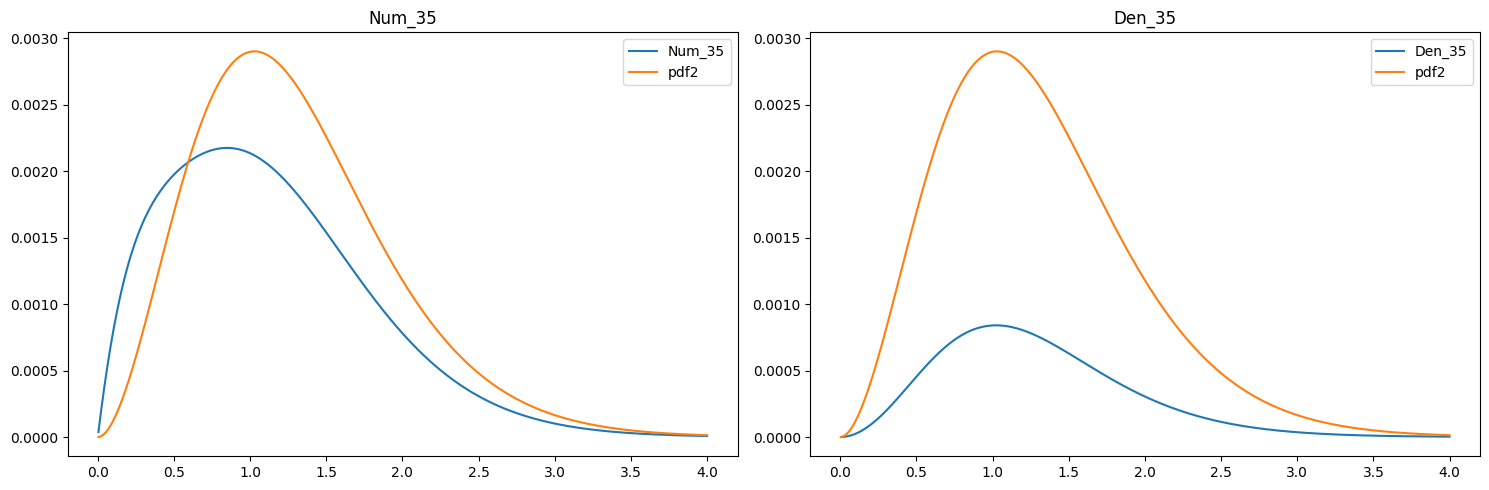

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_35_2d, Den_35_2d]
titles = ['Num_35', 'Den_35']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num35(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_35_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den35(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_35_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_35 = monte_carlo_integration(samples_p2, p2, Num35, Den35)[0]
# print(f"Estimated E using P2: {E_p2_35}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num35, Den35, num_processes)
E_p2_35 = values
Den_p2_35 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_35)

Monte Carlo Integration Result: -2.7411425239700082


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_35 = u3_p2*Phi_5 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_35_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_35)

In [ ]:
def S35_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_35_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_35_p2 = MCI_parallel(samples_p2, p2, S35_p2, num_processes)
print(f"Estimated S35 using P2: {S_35_p2}")

Estimated S35 using P2: 0.023219413992391986


## H_36

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_36 = (Phi_3 * H_Phi6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_36 = (Phi_3*Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_36_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_36, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_36_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_36)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_36_2d = Num_36_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_36_2d = Den_36_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-58>:2: RuntimeWarning: invalid value encountered in divide
  return -sqrt(r1**2 - 2*r1*r2*(r1*r2*sin(phi1)*sin(phi2)*sin(theta1)*sin(theta2) + r1*r2*sin(theta1)*sin(theta2)*cos(phi1)*cos(phi2) + r1*r2*cos(theta1)*cos(theta2))/(sqrt(r1**2*sin(phi1)**2*sin(theta1)**2 + r1**2*sin(theta1)**2*cos(phi1)**2 + r1**2*cos(theta1)**2)*sqrt(r2**2*sin(phi2)**2*sin(theta2)**2 + r2**2*sin(theta2)**2*cos(phi2)**2 + r2**2*cos(theta2)**2)) + r2**2)*(1.0*r1**4*r2**2*sqrt(r1**2 + r2**2 - 2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*abs(r1*r2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)*sin(theta1)**3*sin(theta2)*cos(phi1 - phi2) + 1.0*r1**2*r2**4*sqrt(r1**2 + r2**2 - 2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*abs(r1*r2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)*sin(theta1)*sin(theta2)**3*cos(phi1 - phi2) + r1**2*r2*sqrt(r1**2 + r2**2 - 2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*abs(r1*r2))*(1.0*r2*(-2*(2*r1**2*r2**2*(si

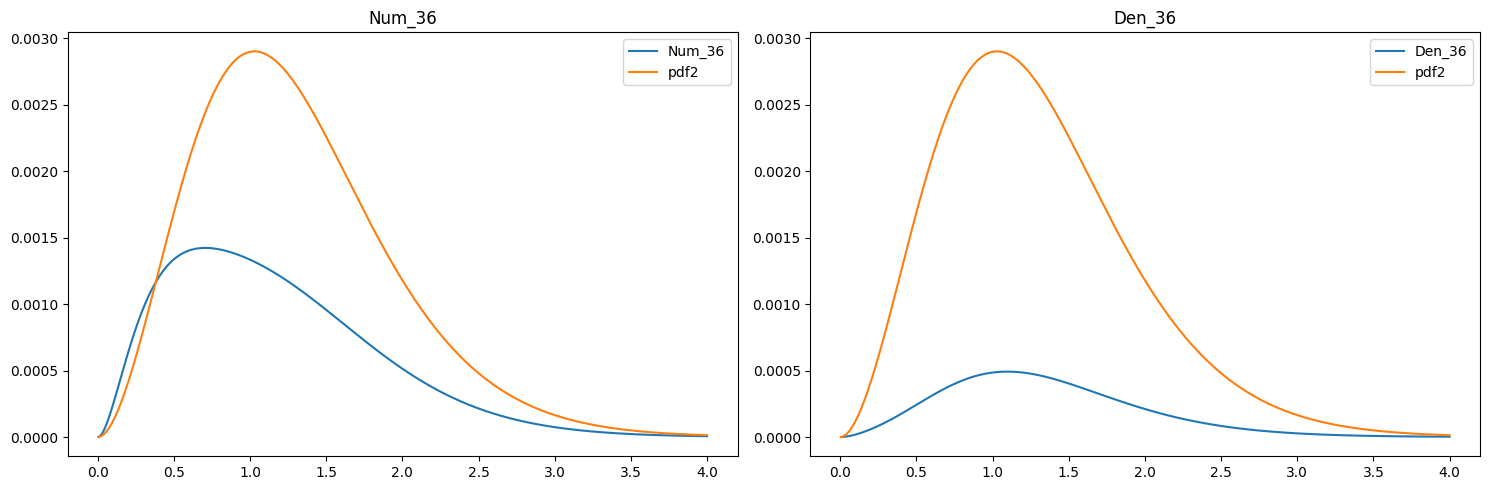

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_36_2d, Den_36_2d]
titles = ['Num_36', 'Den_36']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num36(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_36_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den36(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_36_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_36 = monte_carlo_integration(samples_p2, p2, Num36, Den36)[0]
# print(f"Estimated E using P2: {E_p2_36}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num36, Den36, num_processes)
E_p2_36 = values
Den_p2_36 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_36)

Monte Carlo Integration Result: -2.4695641564818285


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_36 = u3_p2*Phi_6 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_36_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_36)

In [ ]:
def S36_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_36_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_36_p2 = MCI_parallel(samples_p2, p2, S36_p2, num_processes)
print(f"Estimated S36 using P2: {S_36_p2}")

Estimated S36 using P2: 0.08278918110816005


## H_37

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_37 = (Phi_3 * H_Phi7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_37 = (Phi_3*Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_37_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_37, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_37_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_37)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_37_2d = Num_37_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_37_2d = Den_37_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-61>:2: RuntimeWarning: invalid value encountered in divide
  return sqrt(r1**2 - 2*r1*r2*(r1*r2*sin(phi1)*sin(phi2)*sin(theta1)*sin(theta2) + r1*r2*sin(theta1)*sin(theta2)*cos(phi1)*cos(phi2) + r1*r2*cos(theta1)*cos(theta2))/(sqrt(r1**2*sin(phi1)**2*sin(theta1)**2 + r1**2*sin(theta1)**2*cos(phi1)**2 + r1**2*cos(theta1)**2)*sqrt(r2**2*sin(phi2)**2*sin(theta2)**2 + r2**2*sin(theta2)**2*cos(phi2)**2 + r2**2*cos(theta2)**2)) + r2**2)*(-0.5*r1**4*r2**2*(r1 + r2)*((sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + (sin(theta1)*cos(theta2)*cos(phi1 - phi2) - sin(theta2)*cos(theta1))**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 0.5*r1**4*r2**2*

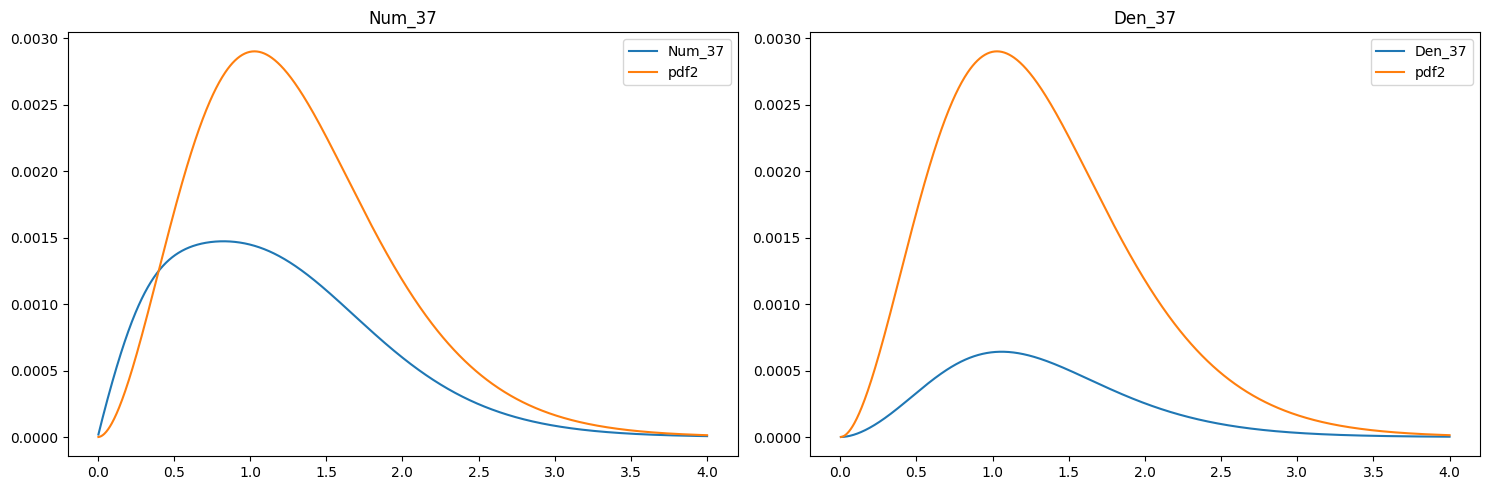

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_37_2d, Den_37_2d]
titles = ['Num_37', 'Den_37']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num37(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_37_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den37(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_37_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_37 = monte_carlo_integration(samples_p2, p2, Num37, Den37)[0]
# print(f"Estimated E using P2: {E_p2_37}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')
values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num37, Den37, num_processes)
E_p2_37 = values
Den_p2_37 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_37)

Monte Carlo Integration Result: -2.524109086150424


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_37 = u3_p2*Phi_7 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_37_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_37)

In [ ]:
def S37_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_37_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_37_p2 = MCI_parallel(samples_p2, p2, S37_p2, num_processes)
print(f"Estimated S37 using P2: {S_37_p2}")

Estimated S37 using P2: 0.06943226004631278


## H_44

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_44 = (Phi_4 * H_Phi4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_44 = (Phi_4*Phi_4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_44_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_44)
Den_44_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_44)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_44_2d = Num_44_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_44_2d = Den_44_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-64>:2: RuntimeWarning: invalid value encountered in divide
  return r1**3*r2**3*(1.0*r1*r2*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 2.0*r1*(r2 - 1)*exp(-2*r1 - 2*r2) - 2.0*r1*exp(-2*r1 - 2*r2) - 2.0*r2*(r1 - 1)*exp(-2*r1 - 2*r2) - 2.0*r2*exp(-2*r1 - 2*r2) - 1.0*(-2*r1*r2*exp(-2*r1 - 2*r2) + r1*exp(-2*r1 - 2*r2))/r2 - 1.0*(-2*r1*r2*exp(-2*r1 - 2*r2) + r2*exp(-2*r1 - 2*r2))/r1)*exp(-2*r1 - 2*r2)*sin(theta1)*sin(theta2)
<lambdifygenerated-64>:2: RuntimeWarning: divide by zero encountered in divide
  return r1**3*r2**3*(1.0*r1*r2*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 2.0*r1*(r2 - 1)*exp(-2*r1 - 2*r2) - 2.0*r1*exp(-2*r1 - 2*r2) - 2.0*r2*(r1 - 1)*exp(-2*r1 - 2*r2) - 2.0*r2*exp(-2*r1 - 2*r2) - 1.0*(-2*r1*r2*ex

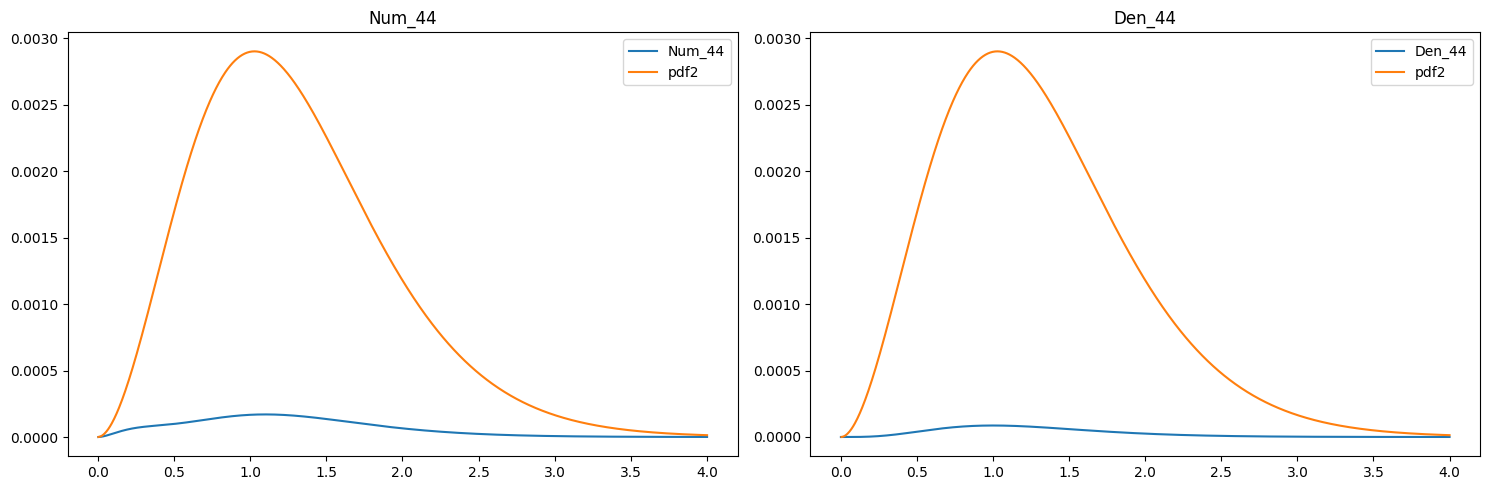

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_44_2d, Den_44_2d]
titles = ['Num_44', 'Den_44']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num44(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_44_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den44(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_44_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_44 = monte_carlo_integration(samples_p2, p2, Num44, Den44)[0]
# print(f"Estimated E using P2: {E_p2_44}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')
values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num44, Den44, num_processes)
E_p2_44 = values
Den_p2_44 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_44)

Monte Carlo Integration Result: -1.9581476305404817


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_4*u1_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
# samples_p2 = samples_p2[burn_in:]

I1_p2 = MCI_parallel(samples_p2, p2, Num_p2, num_processes)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_4*u2_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
# samples_p2 = samples_p2[burn_in:]

I2_p2 = MCI_parallel(samples_p2, p2, Num_p2, num_processes)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_4*u3_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
# samples_p2 = samples_p2[burn_in:]

I3_p2 = MCI_parallel(samples_p2, p2, Num_p2, num_processes)

In [ ]:
u4_p2 = Phi_4 - (I3_p2 * u3_p2) - (I2_p2 * u2_p2) - (I1_p2 * u1_p2)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Norm__p2 = u4_p2*u4_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Norm_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Norm__p2)

def Norm_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Norm_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

I2 = MCI_parallel(samples_p2, p2, Norm_p2, num_processes)

In [ ]:
u4_p2 = u4_p2 / np.sqrt(I2)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_41 = u4_p2*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_42 = u4_p2*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_43 = u4_p2*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_44 = u4_p2*Phi_4 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p2_41_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_41)
S_p2_42_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_42)
S_p2_43_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_43)
S_p2_44_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_44)

In [ ]:
def S41_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_41_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S42_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_42_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S43_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_43_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S44_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_44_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_41_p2 = MCI_parallel(samples_p2, p2, S41_p2, num_processes)
S_42_p2 = MCI_parallel(samples_p2, p2, S42_p2, num_processes)
S_43_p2 = MCI_parallel(samples_p2, p2, S43_p2, num_processes)
S_44_p2 = MCI_parallel(samples_p2, p2, S44_p2, num_processes)

print(f"Estimated S41 using P2: {S_41_p2}")
print(f"Estimated S42 using P2: {S_42_p2}")
print(f"Estimated S43 using P2: {S_43_p2}")
print(f"Estimated S44 using P2: {S_44_p2}")

Estimated S41 using P2: 0.0030768631025604597
Estimated S42 using P2: 0.009529471634340935
Estimated S43 using P2: -0.0004092502896225635
Estimated S44 using P2: 0.02116844799868444


## H_45

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_45 = (Phi_4 * H_Phi5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_45 = (Phi_4*Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_45_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_45)
Den_45_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_45)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_45_2d = Num_45_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_45_2d = Den_45_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-74>:2: RuntimeWarning: invalid value encountered in divide
  return r1*r2*(1.0*r1**4*r2**2/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 2.0*r1**4*r2 + 2.0*r1**3*r2**3/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 6.0*r1**3*r2**2 + 1.0*r1**2*r2**4/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 6.0*r1**2*r2**3 - 2.0*r1**2*r2**2*(-4*(r1 + r2)*exp(-2*r1 - 2*r2) + 2*(r1**2 + 2*r1*r2 + r2**2)*exp(-2*r1 - 2*r2) + exp(-2*(r1 + r2)))*exp(2*r1 + 2*r2) - 1.0*r1**2*r2*((2*r1 + 2*r2)*exp(-2*r1 - 2*r2) - 2*(r1**2 + 2*r1*r2 + r2**2)*exp(-2*r1 - 2*r2))*exp(2*r1 + 2*r2) - 2.0*r1*r2**4 - 1.0*r1*r2**2*((2*r1 + 2*r2)*exp(-2*r1 - 2*r2) - 2*(r1**2 + 2*r1*r2 + r2**2

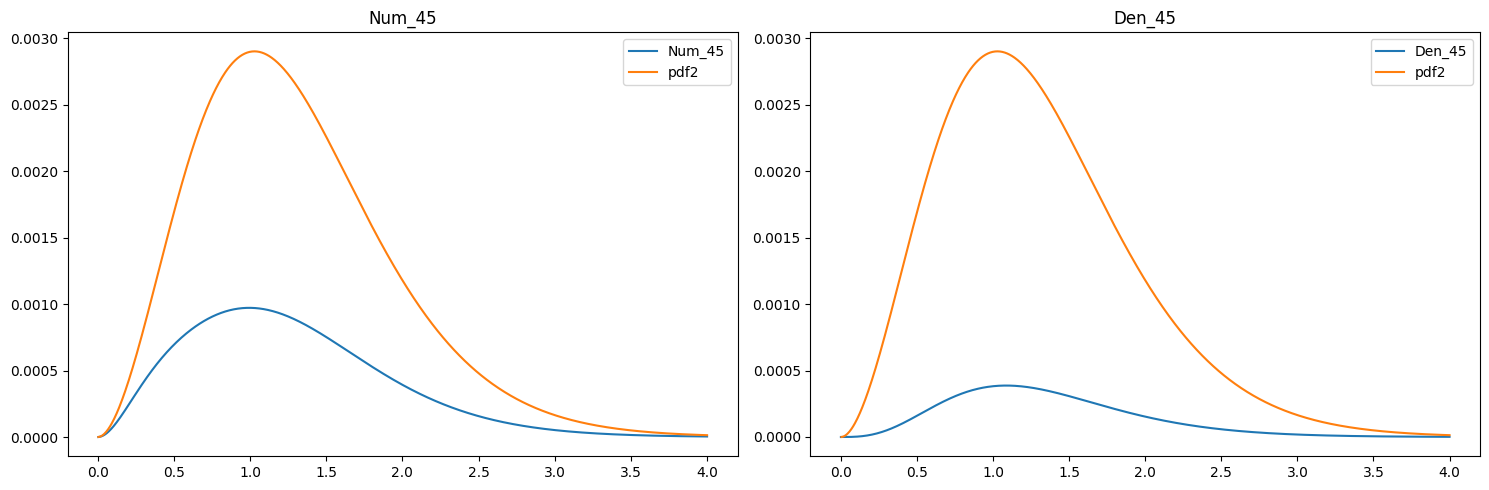

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_45_2d, Den_45_2d]
titles = ['Num_45', 'Den_45']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num45(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_45_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den45(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_45_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_45 = monte_carlo_integration(samples_p2, p2, Num45, Den45)[0]
# print(f"Estimated E using P2: {E_p2_45}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num45, Den45, num_processes)
E_p2_45 = values
Den_p2_45 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_45)

Monte Carlo Integration Result: -2.2590395197187307


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_45 = u4_p2*Phi_5 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_45_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_45)

In [ ]:
def S45_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_45_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_45_p2 = MCI_parallel(samples_p2, p2, S45_p2, num_processes)
print(f"Estimated S45 using P2: {S_45_p2}")

Estimated S45 using P2: 0.05791006885467783


## H_46

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_46 = (Phi_4 * H_Phi6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_46 = (Phi_4*Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_46_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_46, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_46_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_46)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_46_2d = Num_46_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_46_2d = Den_46_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-77>:2: RuntimeWarning: invalid value encountered in divide
  return -r1*r2*(1.0*r1**4*r2**2*sqrt(r1**2 + r2**2 - 2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*abs(r1*r2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)*sin(theta1)**3*sin(theta2)*cos(phi1 - phi2) + 1.0*r1**2*r2**4*sqrt(r1**2 + r2**2 - 2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*abs(r1*r2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)*sin(theta1)*sin(theta2)**3*cos(phi1 - phi2) + r1**2*r2*sqrt(r1**2 + r2**2 - 2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*abs(r1*r2))*(1.0*r2*(-2*(2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2)) - (r1**2 + r2**2)*abs(r1*r2))/abs(r1*r2) - 2*(-4*r1**2*r2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2)) + r1*(r1**2 + r2**2)*sign(r1*r2) + 2*r2*abs(r1*r2))/abs(r1*r2) + (r1**2*(r1**2 + r2**2)*DiracDelta(r1*r2) - 2*r1**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(the

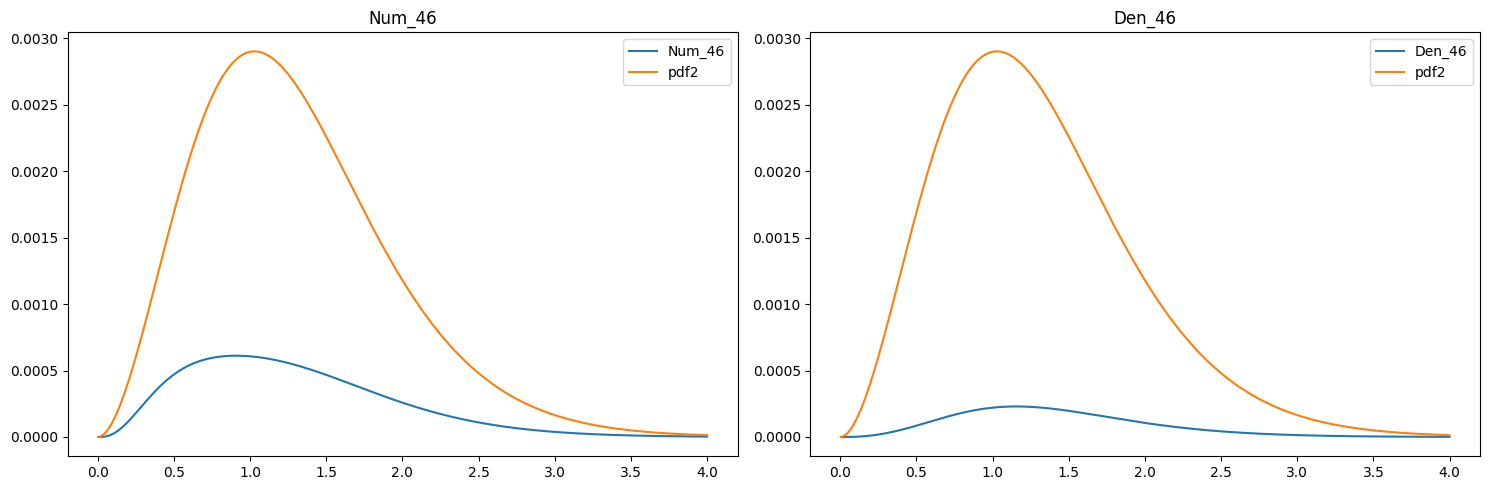

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_46_2d, Den_46_2d]
titles = ['Num_46', 'Den_46']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num46(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_46_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den46(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_46_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_46 = monte_carlo_integration(samples_p2, p2, Num46, Den46)[0]
# print(f"Estimated E using P2: {E_p2_46}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num46, Den46, num_processes)
E_p2_46 = values
Den_p2_46 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_46)

Monte Carlo Integration Result: -2.521933189602097


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_46 = u4_p2*Phi_6 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_46_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_46)

In [ ]:
def S46_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_46_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_46_p2 = MCI_parallel(samples_p2, p2, S46_p2, num_processes)
print(f"Estimated S46 using P2: {S_46_p2}")

Estimated S46 using P2: 0.012376602302683972


## H_47

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_47 = (Phi_4 * H_Phi7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_47 = (Phi_4*Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_47_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_47, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_47_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_47)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_47_2d = Num_47_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_47_2d = Den_47_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-80>:2: RuntimeWarning: divide by zero encountered in divide
  return r1*r2*(-0.5*r1**4*r2**2*(r1 + r2)*((sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + (sin(theta1)*cos(theta2)*cos(phi1 - phi2) - sin(theta2)*cos(theta1))**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 0.5*r1**4*r2**2*(r1 + r2)*(cos(phi1 - phi2)/(abs(r1)*abs(r2)) + sin(theta1)*sin(theta2)*sin(phi1 - phi2)**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)*sin(theta1)/(sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)

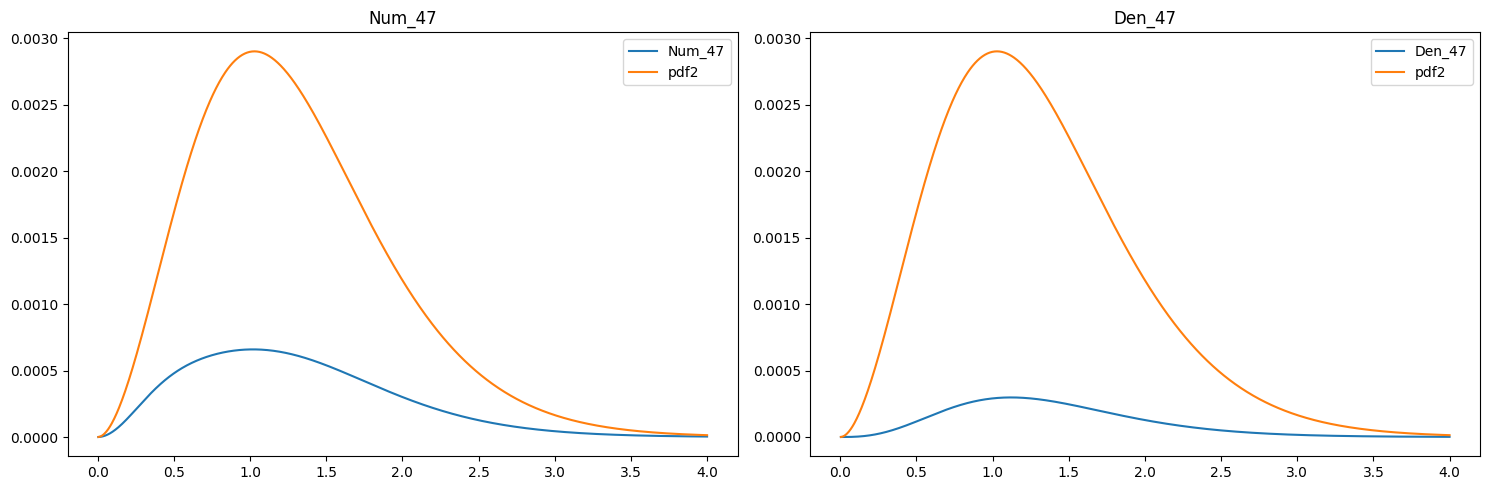

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_47_2d, Den_47_2d]
titles = ['Num_47', 'Den_47']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num47(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_47_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den47(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_47_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# # Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_47 = monte_carlo_integration(samples_p2, p2, Num47, Den47)[0]
# print(f"Estimated E using P2: {E_p2_47}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num47, Den47, num_processes)
E_p2_47 = values
Den_p2_47 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_47)

Monte Carlo Integration Result: -2.384181976231494


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_47 = u4_p2*Phi_7 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_47_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_47)

In [ ]:
def S47_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_47_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_47_p2 = MCI_parallel(samples_p2, p2, S47_p2, num_processes)
print(f"Estimated S47 using P2: {S_47_p2}")

Estimated S47 using P2: 0.024446315444227353


## H_55

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_55 = (Phi_5 * H_Phi5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_55 = (Phi_5*Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_55_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_55)
Den_55_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_55)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_55_2d = Num_55_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_55_2d = Den_55_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-83>:2: RuntimeWarning: invalid value encountered in divide
  return (r1 + r2)**2*(1.0*r1**4*r2**2/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 2.0*r1**4*r2 + 2.0*r1**3*r2**3/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 6.0*r1**3*r2**2 + 1.0*r1**2*r2**4/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 6.0*r1**2*r2**3 - 2.0*r1**2*r2**2*(-4*(r1 + r2)*exp(-2*r1 - 2*r2) + 2*(r1**2 + 2*r1*r2 + r2**2)*exp(-2*r1 - 2*r2) + exp(-2*(r1 + r2)))*exp(2*r1 + 2*r2) - 1.0*r1**2*r2*((2*r1 + 2*r2)*exp(-2*r1 - 2*r2) - 2*(r1**2 + 2*r1*r2 + r2**2)*exp(-2*r1 - 2*r2))*exp(2*r1 + 2*r2) - 2.0*r1*r2**4 - 1.0*r1*r2**2*((2*r1 + 2*r2)*exp(-2*r1 - 2*r2) - 2*(r1**2 + 2*r1*r2 

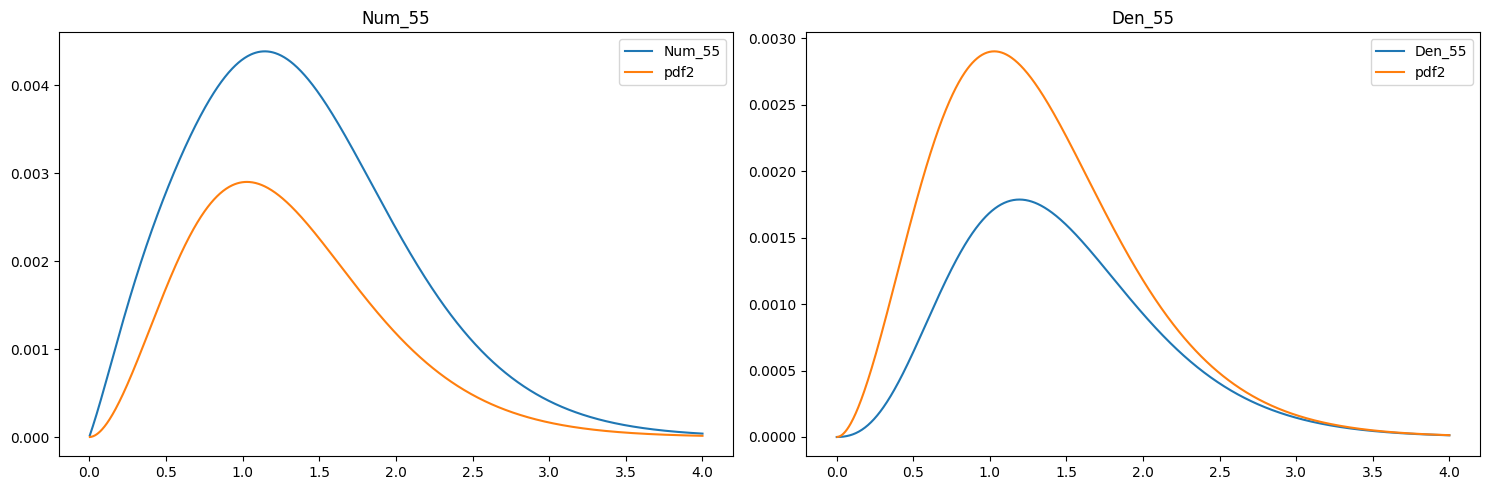

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_55_2d, Den_55_2d]
titles = ['Num_55', 'Den_55']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num55(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_55_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den55(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_55_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_55 = monte_carlo_integration(samples_p2, p2, Num55, Den55)[0]
# print(f"Estimated E using P2: {E_p2_55}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num55, Den55, num_processes)
E_p2_55 = values
Den_p2_55 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_55)

Monte Carlo Integration Result: -2.3986412269879653


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_5*u1_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
# samples_p2 = samples_p2[burn_in:]

I1_p2 = MCI_parallel(samples_p2, p2, Num_p2, num_processes)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_5*u2_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
# samples_p2 = samples_p2[burn_in:]

I2_p2 = MCI_parallel(samples_p2, p2, Num_p2, num_processes)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_5*u3_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
# samples_p2 = samples_p2[burn_in:]

I3_p2 = MCI_parallel(samples_p2, p2, Num_p2, num_processes)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_5*u4_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
# samples_p2 = samples_p2[burn_in:]

I4_p2 = MCI_parallel(samples_p2, p2, Num_p2, num_processes)

In [ ]:
u5_p2 = Phi_5 - (I1_p2 * u1_p2) - (I2_p2 * u2_p2) - (I3_p2 * u3_p2) - (I4_p2 * u4_p2)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Norm__p2 = u5_p2*u5_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Norm_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Norm__p2)

def Norm_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Norm_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

I2 = MCI_parallel(samples_p2, p2, Norm_p2, num_processes)

In [ ]:
u5_p2 = u5_p2 / np.sqrt(I2)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_51 = u5_p2*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_52 = u5_p2*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_53 = u5_p2*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_54 = u5_p2*Phi_4 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_55 = u5_p2*Phi_5 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p2_51_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_51)
S_p2_52_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_52)
S_p2_53_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_53)
S_p2_54_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_54)
S_p2_55_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_55)

In [ ]:
def S51_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_51_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S52_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_52_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S53_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_53_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S54_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_54_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S55_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_55_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_51_p2 = MCI_parallel(samples_p2, p2, S51_p2, num_processes)
S_52_p2 = MCI_parallel(samples_p2, p2, S52_p2, num_processes)
S_53_p2 = MCI_parallel(samples_p2, p2, S53_p2, num_processes)
S_54_p2 = MCI_parallel(samples_p2, p2, S54_p2, num_processes)
S_55_p2 = MCI_parallel(samples_p2, p2, S55_p2, num_processes)

In [ ]:
print(f"Estimated S51 using P2: {S_51_p2}")
print(f"Estimated S52 using P2: {S_52_p2}")
print(f"Estimated S53 using P2: {S_53_p2}")
print(f"Estimated S54 using P2: {S_54_p2}")
print(f"Estimated S55 using P2: {S_55_p2}")

Estimated S51 using P2: 0.001778493715432036
Estimated S52 using P2: 0.0019589981358070076
Estimated S53 using P2: -0.001972442841202964
Estimated S54 using P2: -0.006856182383778787
Estimated S55 using P2: 0.014006821373568006


## H_56

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_56 = (Phi_5 * H_Phi6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_56 = (Phi_5*Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_56_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_56, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_56_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_56)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_56_2d = Num_56_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_56_2d = Den_56_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-95>:2: RuntimeWarning: invalid value encountered in divide
  return -(r1 + r2)**2*(1.0*r1**4*r2**2*sqrt(r1**2 + r2**2 - 2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*abs(r1*r2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)*sin(theta1)**3*sin(theta2)*cos(phi1 - phi2) + 1.0*r1**2*r2**4*sqrt(r1**2 + r2**2 - 2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*abs(r1*r2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)*sin(theta1)*sin(theta2)**3*cos(phi1 - phi2) + r1**2*r2*sqrt(r1**2 + r2**2 - 2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*abs(r1*r2))*(1.0*r2*(-2*(2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2)) - (r1**2 + r2**2)*abs(r1*r2))/abs(r1*r2) - 2*(-4*r1**2*r2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2)) + r1*(r1**2 + r2**2)*sign(r1*r2) + 2*r2*abs(r1*r2))/abs(r1*r2) + (r1**2*(r1**2 + r2**2)*DiracDelta(r1*r2) - 2*r1**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + 

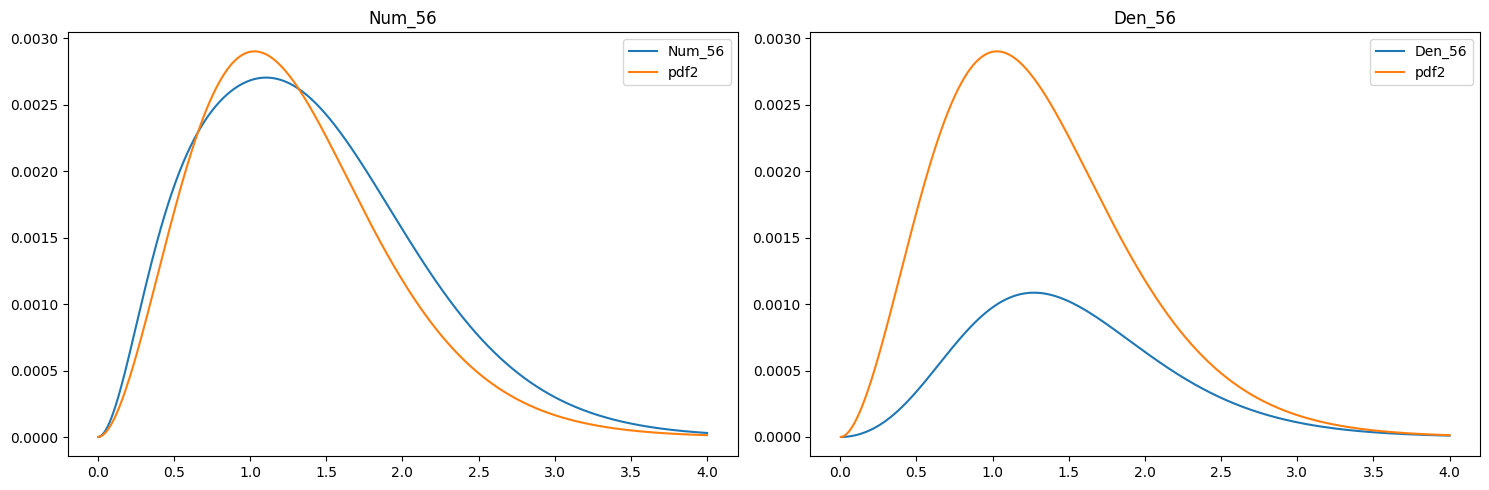

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_56_2d, Den_56_2d]
titles = ['Num_56', 'Den_56']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num56(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_56_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den56(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_56_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# # Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_56 = monte_carlo_integration(samples_p2, p2, Num56, Den56)[0]
# print(f"Estimated E using P2: {E_p2_56}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num56, Den56, num_processes)
E_p2_56 = values
Den_p2_56 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_56)

Monte Carlo Integration Result: -2.556624761113349


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_56 = u5_p2*Phi_6 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_56_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_56)

In [ ]:
def S56_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_56_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_56_p2 = MCI_parallel(samples_p2, p2, S56_p2, num_processes)
print(f"Estimated S56 using P2: {S_56_p2}")

Estimated S56 using P2: -0.0029195764704853105


## H_57

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_57 = (Phi_5 * H_Phi7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_57 = (Phi_5*Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_57_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_57, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_57_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_57)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_57_2d = Num_57_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_57_2d = Den_57_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-98>:2: RuntimeWarning: divide by zero encountered in divide
  return (r1 + r2)**2*(-0.5*r1**4*r2**2*(r1 + r2)*((sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + (sin(theta1)*cos(theta2)*cos(phi1 - phi2) - sin(theta2)*cos(theta1))**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 0.5*r1**4*r2**2*(r1 + r2)*(cos(phi1 - phi2)/(abs(r1)*abs(r2)) + sin(theta1)*sin(theta2)*sin(phi1 - phi2)**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)*sin(theta1)/(sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(

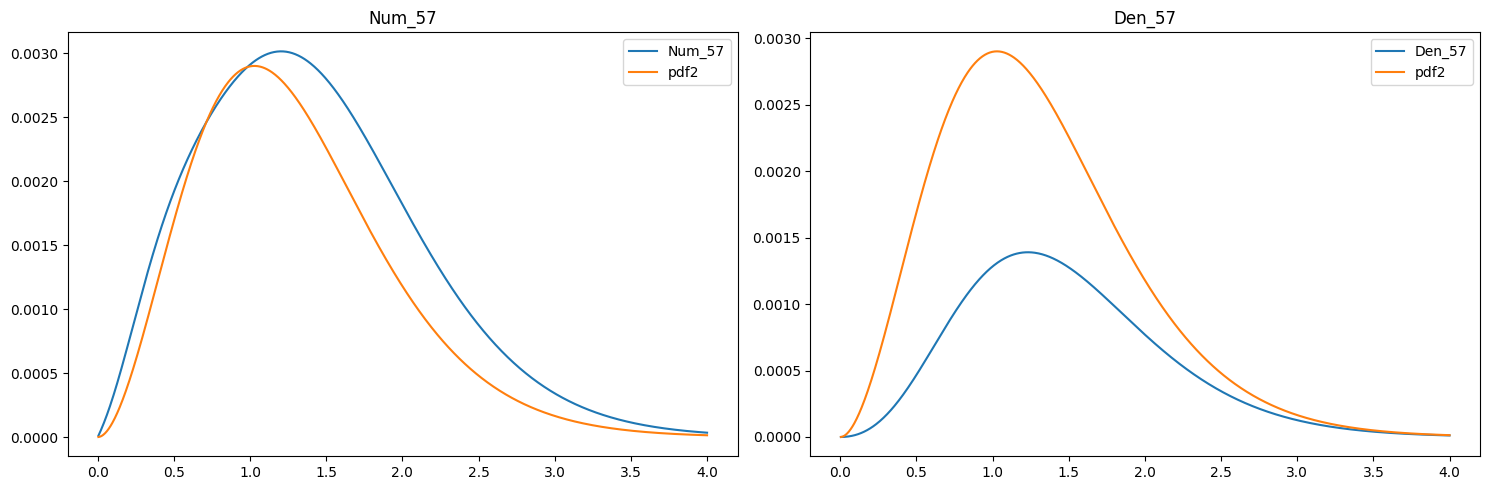

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_57_2d, Den_57_2d]
titles = ['Num_57', 'Den_57']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num57(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_57_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den57(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_57_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# # Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_57 = monte_carlo_integration(samples_p2, p2, Num57, Den57)[0]
# print(f"Estimated E using P2: {E_p2_57}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num57, Den57, num_processes)
E_p2_57 = values
Den_p2_57 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_57)

Monte Carlo Integration Result: -2.464773208572844


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_57 = u5_p2*Phi_7 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_57_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_57)

In [ ]:
def S57_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_57_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_57_p2 = MCI_parallel(samples_p2, p2, S57_p2, num_processes)
print(f"Estimated S57 using P2: {S_57_p2}")

Estimated S57 using P2: 0.0025730646525303335


## H_66

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_66 = (Phi_6 * H_Phi6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_66 = (Phi_6*Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_66_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_66, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_66_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_66)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_66_2d = Num_66_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_66_2d = Den_66_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-101>:2: RuntimeWarning: invalid value encountered in divide
  return -(r1**2 - 2*r1*r2*(r1*r2*sin(phi1)*sin(phi2)*sin(theta1)*sin(theta2) + r1*r2*sin(theta1)*sin(theta2)*cos(phi1)*cos(phi2) + r1*r2*cos(theta1)*cos(theta2))/(sqrt(r1**2*sin(phi1)**2*sin(theta1)**2 + r1**2*sin(theta1)**2*cos(phi1)**2 + r1**2*cos(theta1)**2)*sqrt(r2**2*sin(phi2)**2*sin(theta2)**2 + r2**2*sin(theta2)**2*cos(phi2)**2 + r2**2*cos(theta2)**2)) + r2**2)*(1.0*r1**4*r2**2*sqrt(r1**2 + r2**2 - 2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*abs(r1*r2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)*sin(theta1)**3*sin(theta2)*cos(phi1 - phi2) + 1.0*r1**2*r2**4*sqrt(r1**2 + r2**2 - 2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*abs(r1*r2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)*sin(theta1)*sin(theta2)**3*cos(phi1 - phi2) + r1**2*r2*sqrt(r1**2 + r2**2 - 2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*abs(r1*r2))*(1.0*r2*(-2*(2*r1**2*r2**2*(sin(t

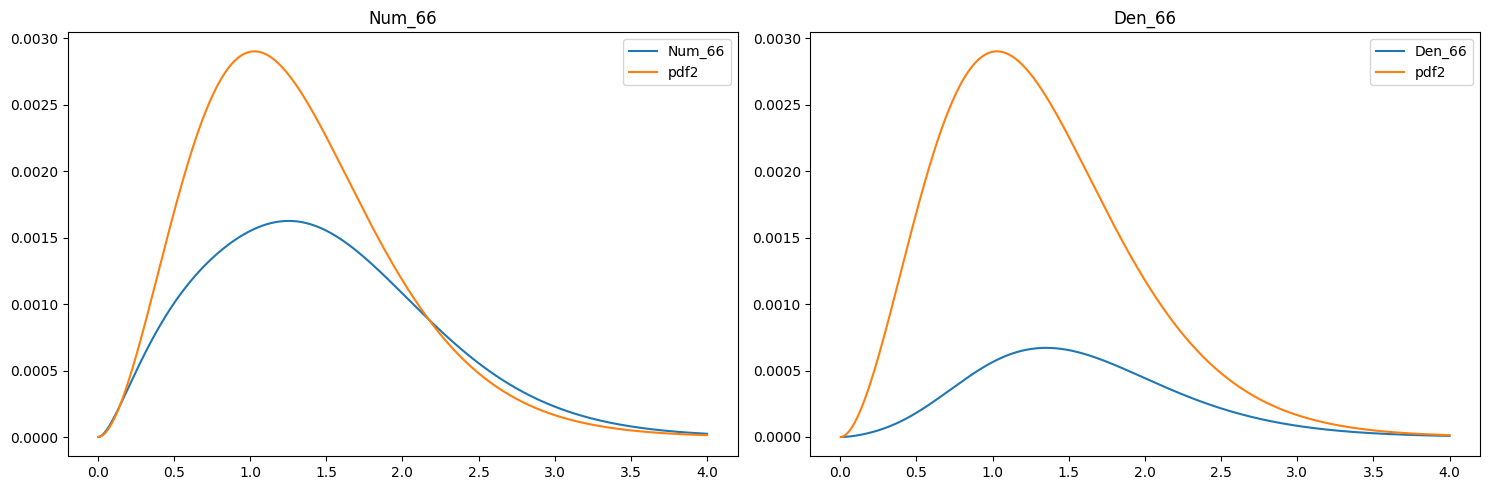

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_66_2d, Den_66_2d]
titles = ['Num_66', 'Den_66']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num66(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_66_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den66(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_66_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_66 = monte_carlo_integration(samples_p2, p2, Num66, Den66)[0]
# print(f"Estimated E using P2: {E_p2_66}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num66, Den66, num_processes)
E_p2_66 = values
Den_p2_66 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_66)

Monte Carlo Integration Result: -2.208227988381105


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_6*u1_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)


def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
# samples_p2 = samples_p2[burn_in:]

I1_p2 = MCI_parallel(samples_p2, p2, Num_p2, num_processes)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_6*u2_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)


def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
# samples_p2 = samples_p2[burn_in:]

I2_p2 = MCI_parallel(samples_p2, p2, Num_p2, num_processes)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_6*u3_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
# samples_p2 = samples_p2[burn_in:]

I3_p2 = MCI_parallel(samples_p2, p2, Num_p2, num_processes)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_6*u4_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
# samples_p2 = samples_p2[burn_in:]

I4_p2 = MCI_parallel(samples_p2, p2, Num_p2, num_processes)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_6*u5_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
# samples_p2 = samples_p2[burn_in:]

I5_p2 = MCI_parallel(samples_p2, p2, Num_p2, num_processes)

In [ ]:
u6_p2 = Phi_6 - (I1_p2 * u1_p2) - (I2_p2 * u2_p2) - (I3_p2 * u3_p2) - (I4_p2 * u4_p2) - (I5_p2 * u5_p2)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Norm__p2 = u6_p2*u6_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Norm_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Norm__p2)

def Norm_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Norm_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

I2 = MCI_parallel(samples_p2, p2, Norm_p2, num_processes)

In [ ]:
u6_p2 = u6_p2 / np.sqrt(I2)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_61 = u6_p2*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_62 = u6_p2*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_63 = u6_p2*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_64 = u6_p2*Phi_4 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_65 = u6_p2*Phi_5 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_66 = u6_p2*Phi_6 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p2_61_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_61)
S_p2_62_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_62)
S_p2_63_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_63)
S_p2_64_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_64)
S_p2_65_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_65)
S_p2_66_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_66)

In [ ]:
def S61_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_61_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S62_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_62_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S63_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_63_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S64_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_64_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S65_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_65_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S66_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_66_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_61_p2 = MCI_parallel(samples_p2, p2, S61_p2, num_processes)
S_62_p2 = MCI_parallel(samples_p2, p2, S62_p2, num_processes)
S_63_p2 = MCI_parallel(samples_p2, p2, S63_p2, num_processes)
S_64_p2 = MCI_parallel(samples_p2, p2, S64_p2, num_processes)
S_65_p2 = MCI_parallel(samples_p2, p2, S65_p2, num_processes)
S_66_p2 = MCI_parallel(samples_p2, p2, S66_p2, num_processes)

In [ ]:
print(f"Estimated S61 using P2: {S_61_p2}")
print(f"Estimated S62 using P2: {S_62_p2}")
print(f"Estimated S63 using P2: {S_63_p2}")
print(f"Estimated S64 using P2: {S_64_p2}")
print(f"Estimated S65 using P2: {S_65_p2}")
print(f"Estimated S66 using P2: {S_66_p2}")

Estimated S61 using P2: 0.004081161702477645
Estimated S62 using P2: -0.005651822310396771
Estimated S63 using P2: -0.010112756612459443
Estimated S64 using P2: -0.002169105004059793
Estimated S65 using P2: -0.002109668775951064
Estimated S66 using P2: -0.0028581907487303993


## H_67

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_67 = (Phi_6 * H_Phi7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_67 = (Phi_6*Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_67_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_67, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_67_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_67)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_67_2d = Num_67_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_67_2d = Den_67_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-115>:2: RuntimeWarning: invalid value encountered in divide
  return (r1**2 - 2*r1*r2*(r1*r2*sin(phi1)*sin(phi2)*sin(theta1)*sin(theta2) + r1*r2*sin(theta1)*sin(theta2)*cos(phi1)*cos(phi2) + r1*r2*cos(theta1)*cos(theta2))/(sqrt(r1**2*sin(phi1)**2*sin(theta1)**2 + r1**2*sin(theta1)**2*cos(phi1)**2 + r1**2*cos(theta1)**2)*sqrt(r2**2*sin(phi2)**2*sin(theta2)**2 + r2**2*sin(theta2)**2*cos(phi2)**2 + r2**2*cos(theta2)**2)) + r2**2)*(-0.5*r1**4*r2**2*(r1 + r2)*((sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + (sin(theta1)*cos(theta2)*cos(phi1 - phi2) - sin(theta2)*cos(theta1))**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 0.5*r1**4*r2**2*(r1

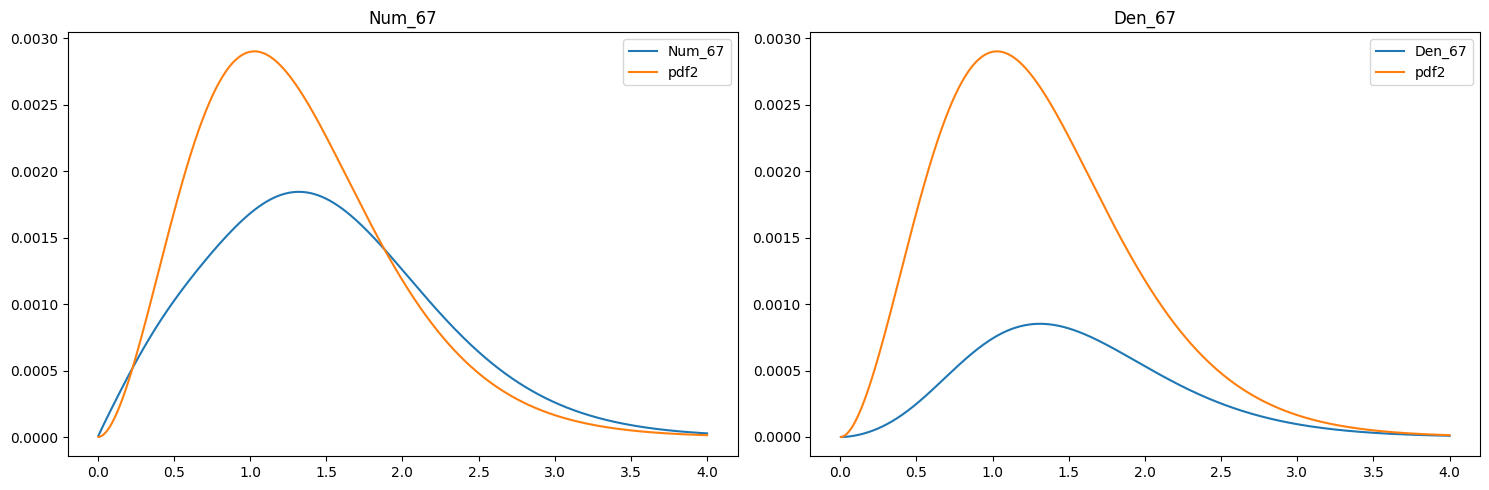

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_67_2d, Den_67_2d]
titles = ['Num_67', 'Den_67']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num67(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_67_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den67(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_67_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_67 = monte_carlo_integration(samples_p2, p2, Num67, Den67)[0]
# print(f"Estimated E using P2: {E_p2_67}")
# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num67, Den67, num_processes)
E_p2_67 = values
Den_p2_67 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_67)

Monte Carlo Integration Result: -2.3351911306644957


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_67 = u6_p2*Phi_7 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_67_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_67)

In [ ]:
def S67_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_67_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_67_p2 = MCI_parallel(samples_p2, p2, S67_p2, num_processes)
print(f"Estimated S67 using P2: {S_67_p2}")

Estimated S67 using P2: -0.004964352090183063


## H_77

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_77 = (Phi_7 * H_Phi7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_77 = (Phi_7*Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_77_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_77, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_77_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_77)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_77_2d = Num_77_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_77_2d = Den_77_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-118>:2: RuntimeWarning: invalid value encountered in divide
  return (r1 + r2)*sqrt(r1**2 - 2*r1*r2*(r1*r2*sin(phi1)*sin(phi2)*sin(theta1)*sin(theta2) + r1*r2*sin(theta1)*sin(theta2)*cos(phi1)*cos(phi2) + r1*r2*cos(theta1)*cos(theta2))/(sqrt(r1**2*sin(phi1)**2*sin(theta1)**2 + r1**2*sin(theta1)**2*cos(phi1)**2 + r1**2*cos(theta1)**2)*sqrt(r2**2*sin(phi2)**2*sin(theta2)**2 + r2**2*sin(theta2)**2*cos(phi2)**2 + r2**2*cos(theta2)**2)) + r2**2)*(-0.5*r1**4*r2**2*(r1 + r2)*((sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + (sin(theta1)*cos(theta2)*cos(phi1 - phi2) - sin(theta2)*cos(theta1))**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 0.5*r

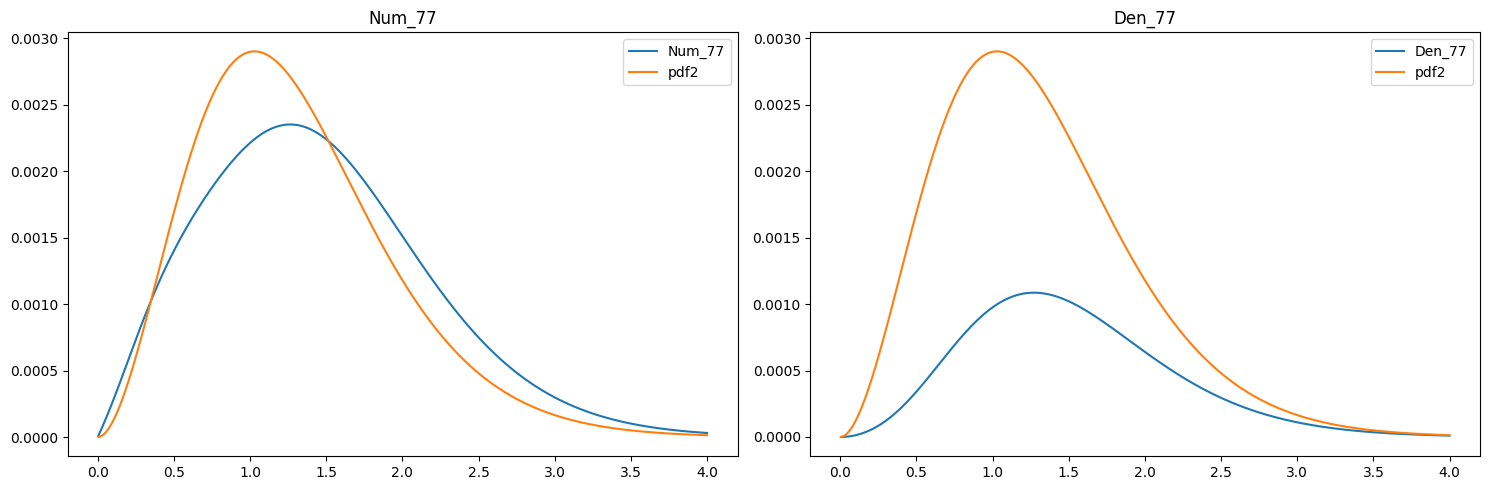

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_77_2d, Den_77_2d]
titles = ['Num_77', 'Den_77']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d/10, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num77(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_77_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den77(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_77_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.7895, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# Run Metropolis sampling
# result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

# samples_p2 = result_p2[0]
# num_accept_p2 = result_p2[1]

# ## burn_in period
# burn_in = 12000
# samples_p2 = samples_p2[burn_in:]

# E_p2_77 = monte_carlo_integration(samples_p2, p2, Num77, Den77)[0]

# print(f"Estimated E using P2: {E_p2_77}")

# print("Number of Samples Collected: %s"%len(samples_p2))
# print("Number of Samples Accepted: %s"%(num_accept_p2))
# print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
# print('')

values, mean_Num, mean_Den, samples = monte_carlo_parallel(p2, initial, num_samples, range_value, std, Num77, Den77, num_processes)
E_p2_77 = values
Den_p2_77 = mean_Den
samples_p2 = samples
burn_in = 12000
samples_p2 = samples_p2[burn_in:]
print("Monte Carlo Integration Result:", E_p2_77)

Monte Carlo Integration Result: -2.381155785405165


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_7*u1_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
# samples_p2 = samples_p2[burn_in:]

I1_p2 = MCI_parallel(samples_p2, p2, Num_p2, num_processes)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_7*u2_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)


def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
# samples_p2 = samples_p2[burn_in:]

I2_p2 = MCI_parallel(samples_p2, p2, Num_p2, num_processes)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_7*u3_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
# samples_p2 = samples_p2[burn_in:]

I3_p2 = MCI_parallel(samples_p2, p2, Num_p2, num_processes)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_7*u4_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)


def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
# samples_p2 = samples_p2[burn_in:]

I4_p2 = MCI_parallel(samples_p2, p2, Num_p2, num_processes)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_7*u5_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
# samples_p2 = samples_p2[burn_in:]

I5_p2 = MCI_parallel(samples_p2, p2, Num_p2, num_processes)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_7*u6_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
# samples_p2 = samples_p2[burn_in:]

I6_p2 = MCI_parallel(samples_p2, p2, Num_p2, num_processes)

In [ ]:
u7_p2 = Phi_7 - (I1_p2 * u1_p2) - (I2_p2 * u2_p2) - (I3_p2 * u3_p2) - (I4_p2 * u4_p2) - (I5_p2 * u5_p2) - (I6_p2 * u6_p2)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Norm__p2 = u7_p2*u7_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Norm_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Norm__p2)

def Norm_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Norm_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

I2 = MCI_parallel(samples_p2, p2, Norm_p2, num_processes)

In [ ]:
u7_p2 = u7_p2 / np.sqrt(I2)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p2_71 = u7_p2*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_72 = u7_p2*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_73 = u7_p2*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_74 = u7_p2*Phi_4 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_75 = u7_p2*Phi_5 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_76 = u7_p2*Phi_6 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_77 = u7_p2*Phi_7 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)


S_p2_71_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_71)
S_p2_72_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_72)
S_p2_73_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_73)
S_p2_74_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_74)
S_p2_75_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_75)
S_p2_76_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_76)
S_p2_77_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_77)

In [ ]:
def S71_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_71_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S72_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_72_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S73_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_73_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S74_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_74_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S75_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_75_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S76_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_76_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S77_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_77_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_71_p2 = MCI_parallel(samples_p2, p2, S71_p2, num_processes)
S_72_p2 = MCI_parallel(samples_p2, p2, S72_p2, num_processes)
S_73_p2 = MCI_parallel(samples_p2, p2, S73_p2, num_processes)
S_74_p2 = MCI_parallel(samples_p2, p2, S74_p2, num_processes)
S_75_p2 = MCI_parallel(samples_p2, p2, S75_p2, num_processes)
S_76_p2 = MCI_parallel(samples_p2, p2, S76_p2, num_processes)
S_77_p2 = MCI_parallel(samples_p2, p2, S77_p2, num_processes)

In [ ]:
print(f"Estimated S71 using P2: {S_71_p2}")
print(f"Estimated S72 using P2: {S_72_p2}")
print(f"Estimated S73 using P2: {S_73_p2}")
print(f"Estimated S74 using P2: {S_74_p2}")
print(f"Estimated S75 using P2: {S_75_p2}")
print(f"Estimated S76 using P2: {S_76_p2}")
print(f"Estimated S77 using P2: {S_77_p2}")

Estimated S71 using P2: 0.004130887455099177
Estimated S72 using P2: -0.004267655530741019
Estimated S73 using P2: -0.009566948200549584
Estimated S74 using P2: -0.003058077567065668
Estimated S75 using P2: 0.0015957766504299331
Estimated S76 using P2: -0.005432307480849896
Estimated S77 using P2: -0.0028032875505637953


## Matrix Diagonalization and Minimum Energy Eigenvalue

In [ ]:
H_non_orth_P2 = np.matrix([[E_p2_11, E_p2_12, E_p2_13, E_p2_14, E_p2_15, E_p2_16, E_p2_17],
                           [E_p2_12, E_p2_22, E_p2_23, E_p2_24, E_p2_25, E_p2_26, E_p2_27],
                           [E_p2_13, E_p2_23, E_p2_33, E_p2_34, E_p2_35, E_p2_36, E_p2_37],
                           [E_p2_14, E_p2_24, E_p2_34, E_p2_44, E_p2_45, E_p2_46, E_p2_47],
                           [E_p2_15, E_p2_25, E_p2_35, E_p2_45, E_p2_55, E_p2_56, E_p2_57],
                           [E_p2_16, E_p2_26, E_p2_36, E_p2_46, E_p2_56, E_p2_66, E_p2_67],
                           [E_p2_17, E_p2_27, E_p2_37, E_p2_47, E_p2_57, E_p2_67, E_p2_77]])

In [ ]:
S_p2 = np.matrix([[S_11_p2, S_12_p2, S_13_p2, S_14_p2, S_15_p2, S_16_p2, S_17_p2],
                  [S_21_p2, S_22_p2, S_23_p2, S_24_p2, S_25_p2, S_26_p2, S_27_p2],
                  [S_31_p2, S_32_p2, S_33_p2, S_34_p2, S_35_p2, S_36_p2, S_37_p2],
                  [S_41_p2, S_42_p2, S_43_p2, S_44_p2, S_45_p2, S_46_p2, S_47_p2],
                  [S_51_p2, S_52_p2, S_53_p2, S_54_p2, S_55_p2, S_56_p2, S_57_p2],
                  [S_61_p2, S_62_p2, S_63_p2, S_64_p2, S_65_p2, S_66_p2, S_67_p2],
                  [S_71_p2, S_72_p2, S_73_p2, S_74_p2, S_75_p2, S_76_p2, S_77_p2]])

In [ ]:
H_orth_p2 = S_p2 @ H_non_orth_P2 @ S_p2.getH()

In [ ]:
eigenvalues_p2, eigenvectors_p2 = np.linalg.eigh(H_orth_p2)

In [ ]:
eigenvalues_p2

array([-2.56953631e+00, -1.21405851e-05, -3.50586185e-07, -2.93080275e-08,
        1.52337523e-05,  2.24500015e-03,  3.68238956e-03])

In [ ]:
print(min(eigenvalues_p2))

-2.5695363124502246


In [ ]:
# -2.5695363124502246